In [1]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt

zip_file_path = 'CV.zip'
path = 'CV/'

# Unzip the dataset if not already extracted
if not os.path.exists(path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall()

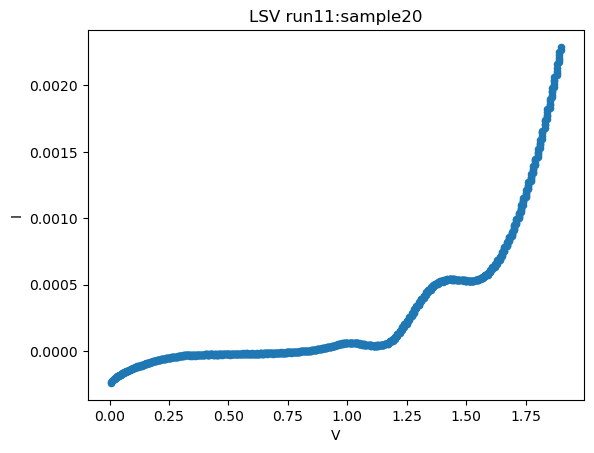

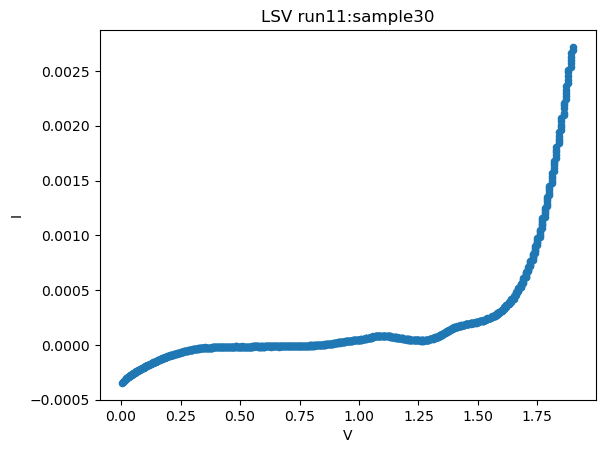

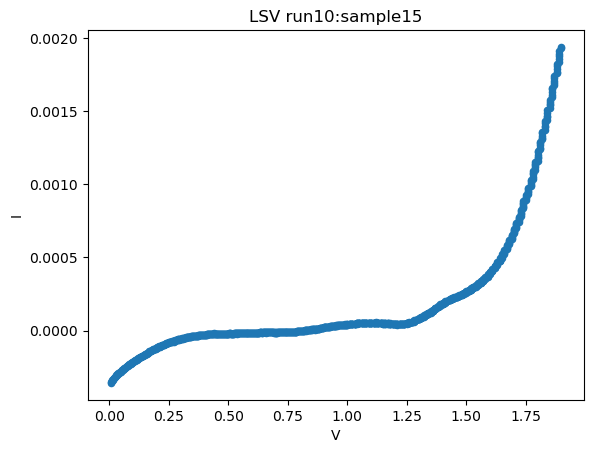

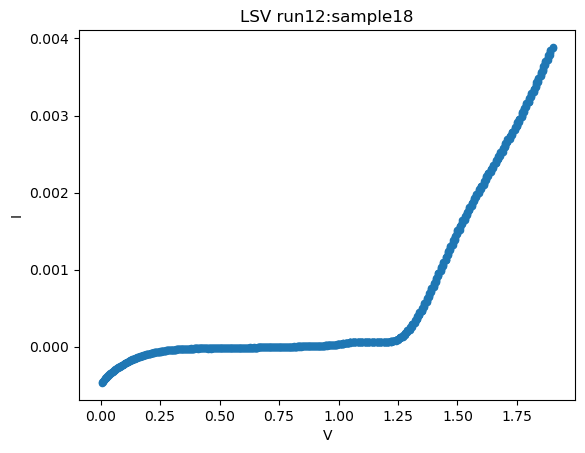

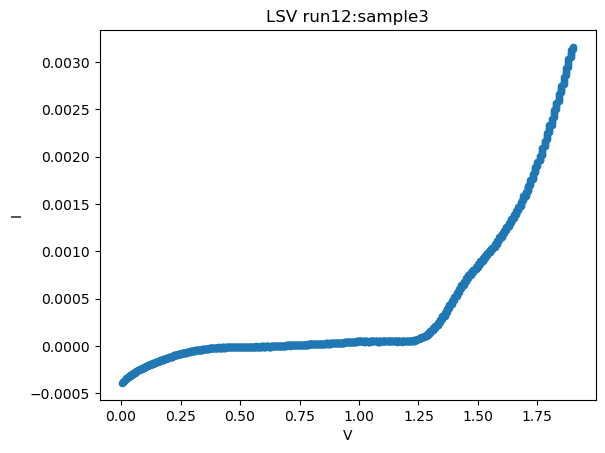

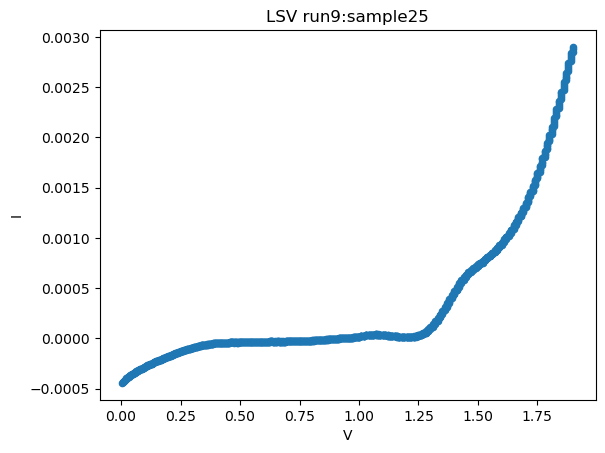

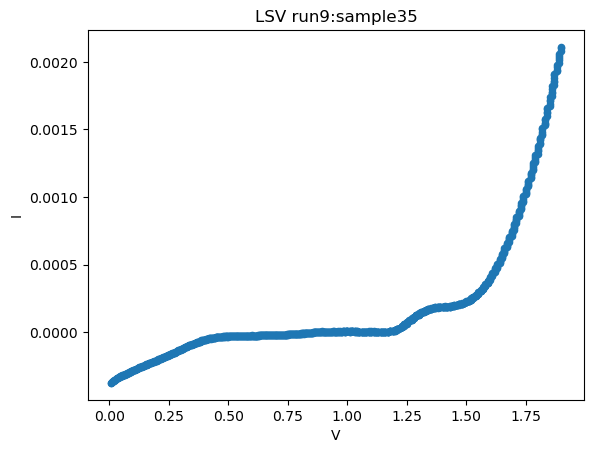

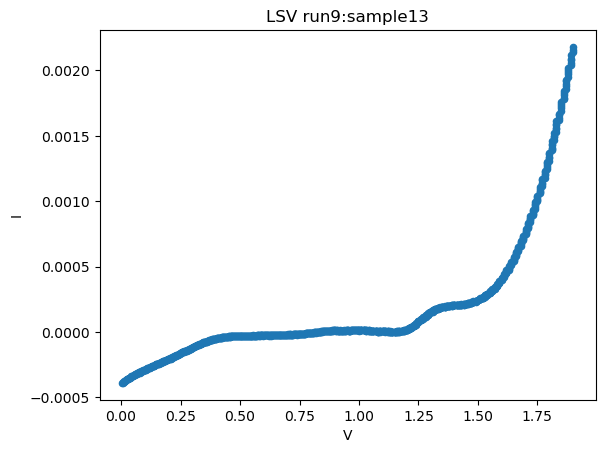

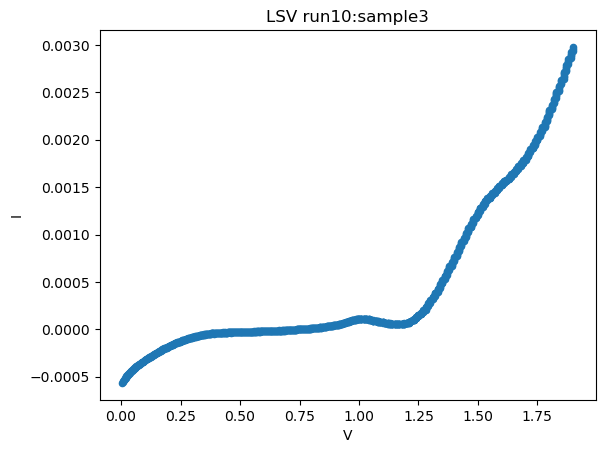

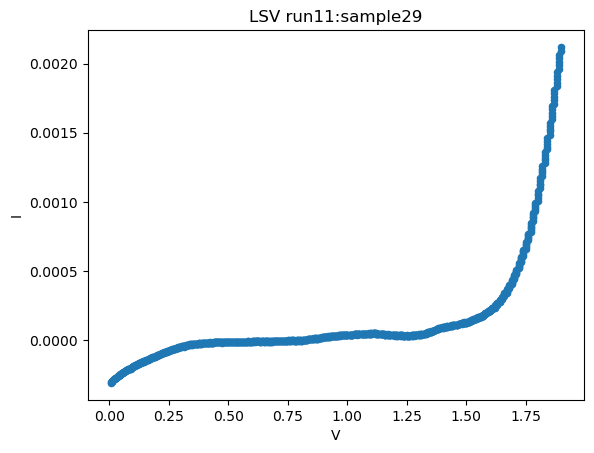

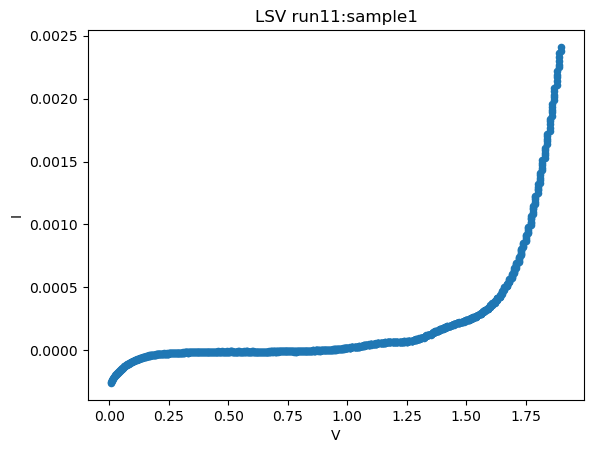

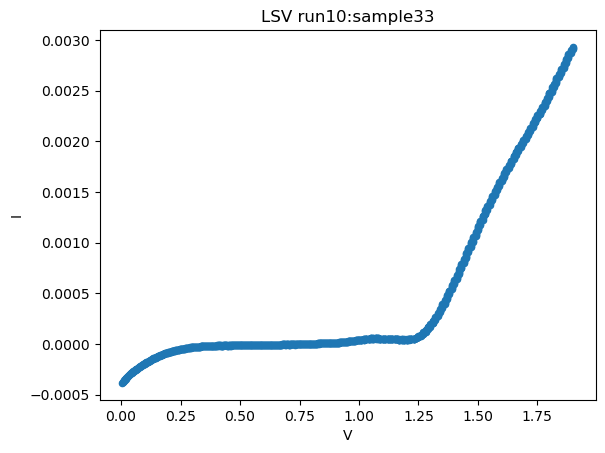

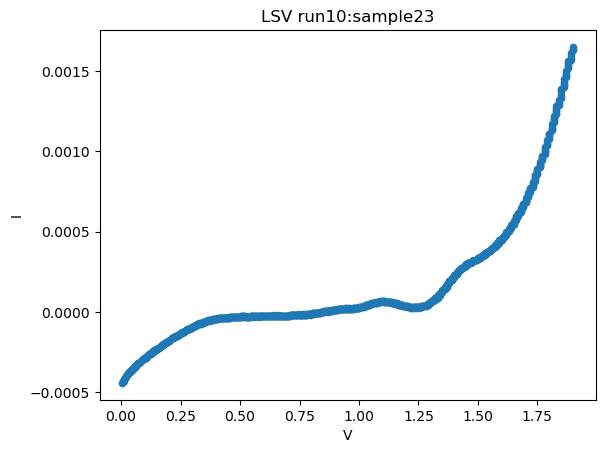

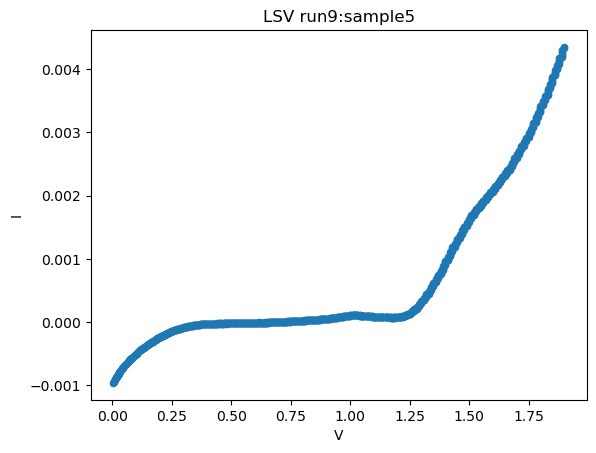

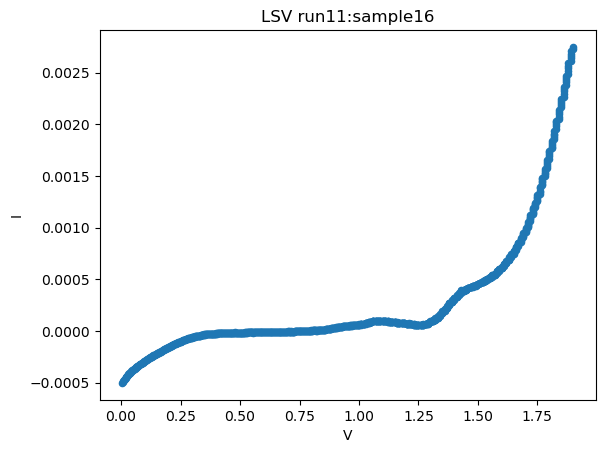

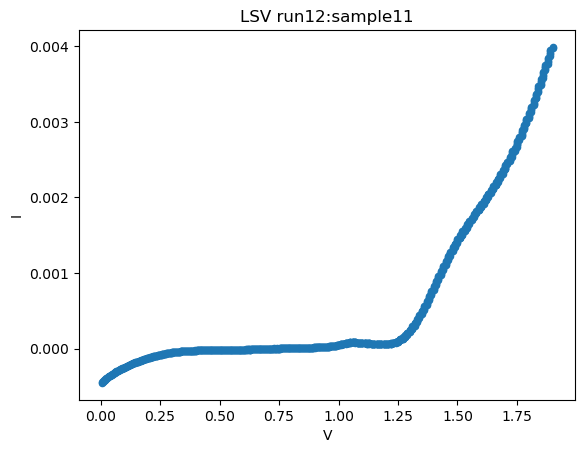

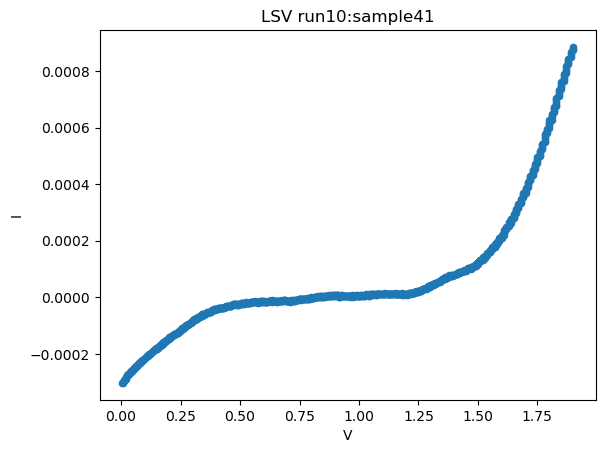

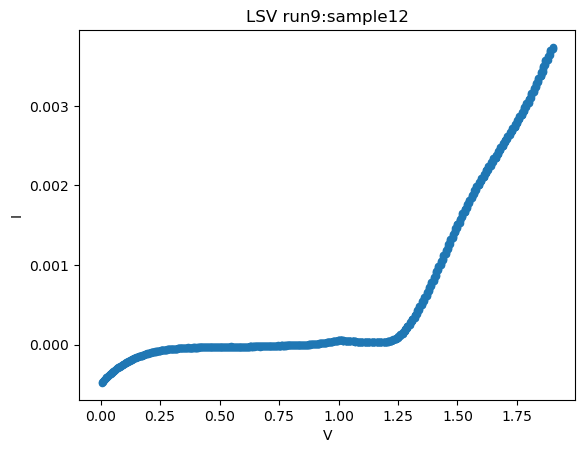

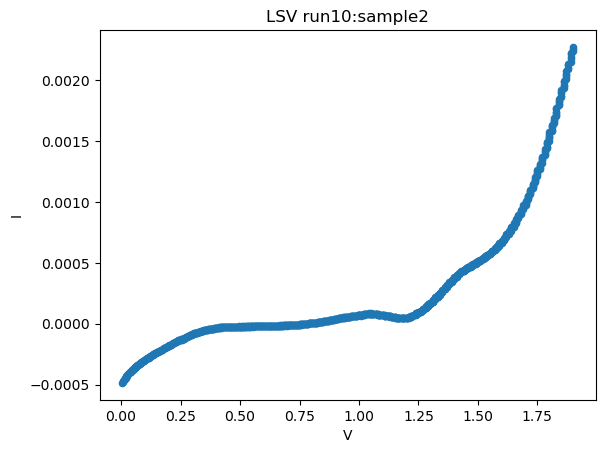

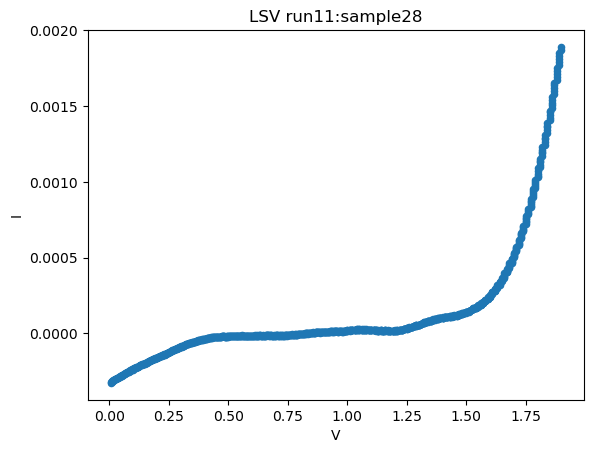

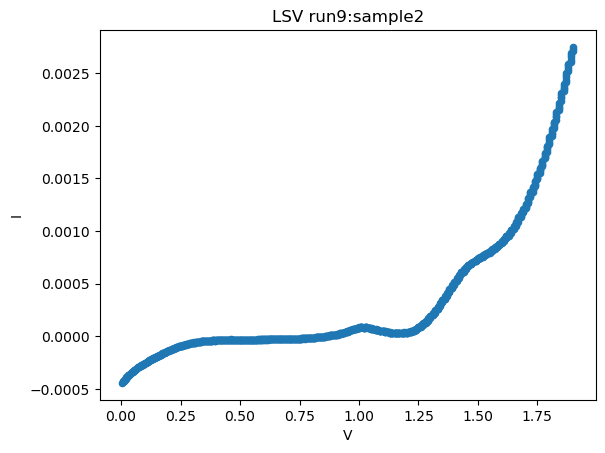

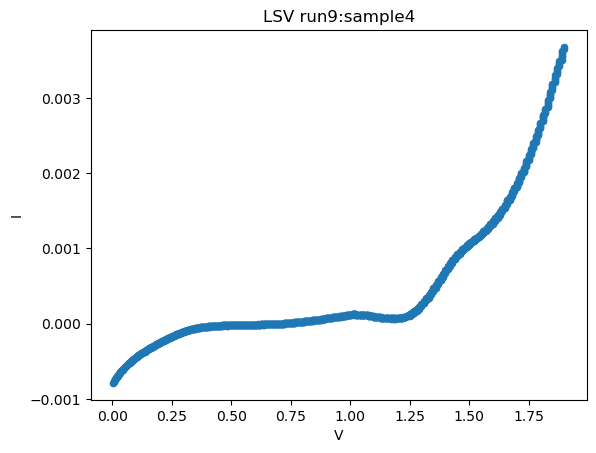

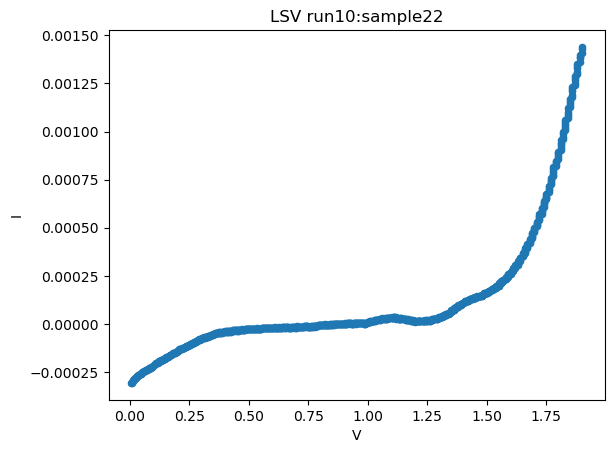

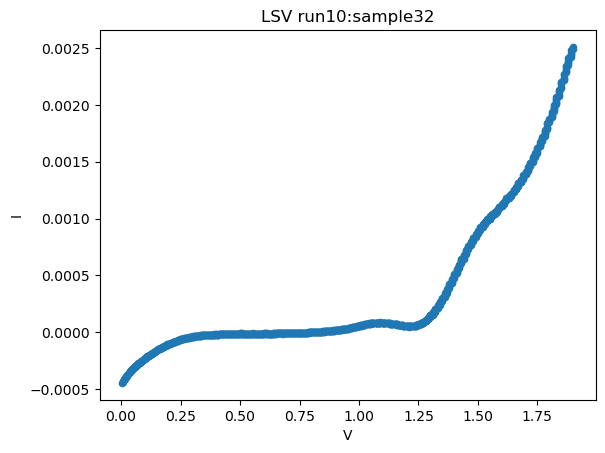

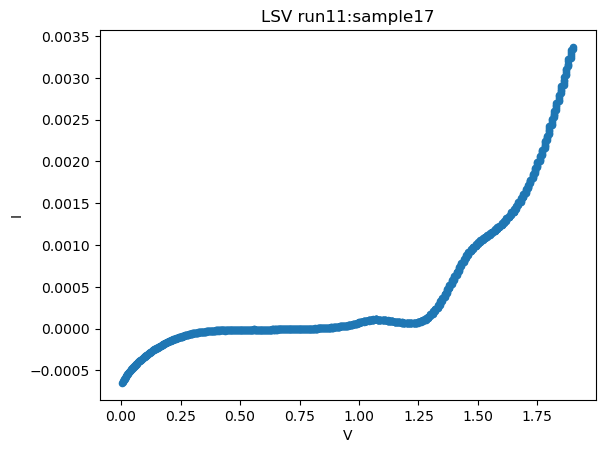

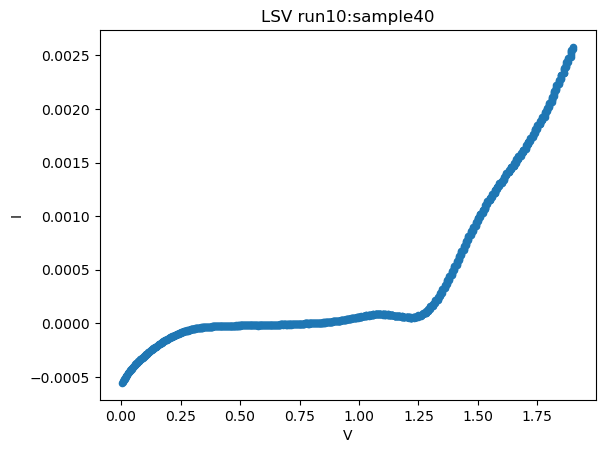

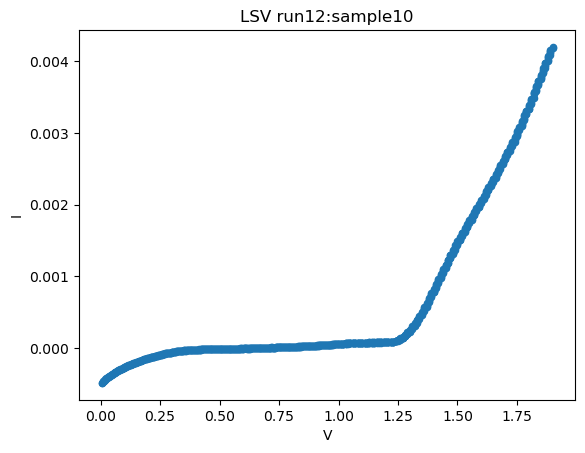

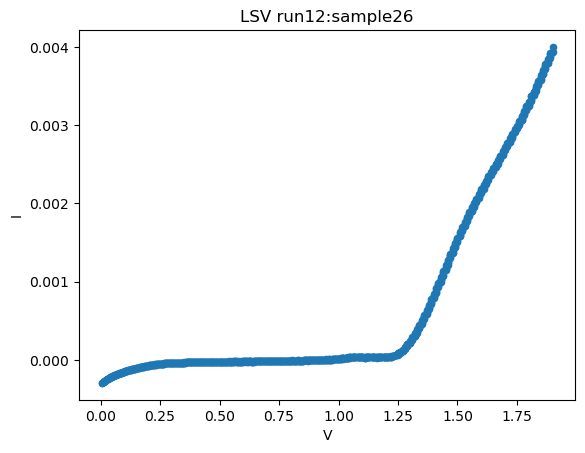

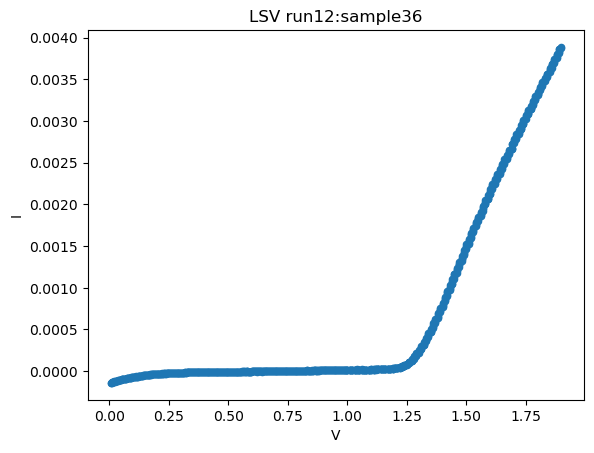

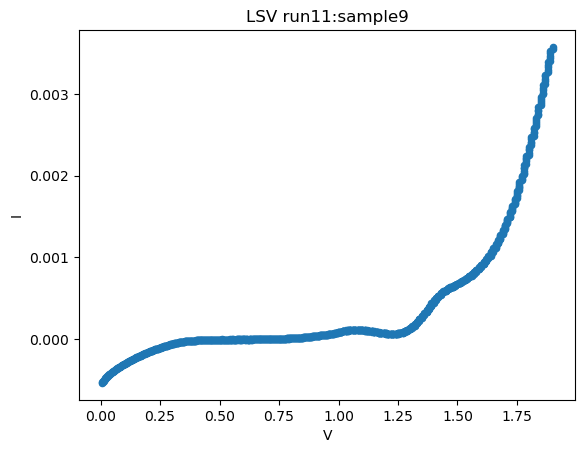

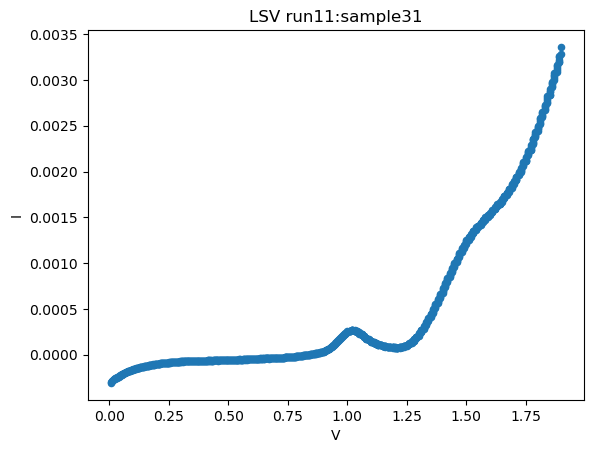

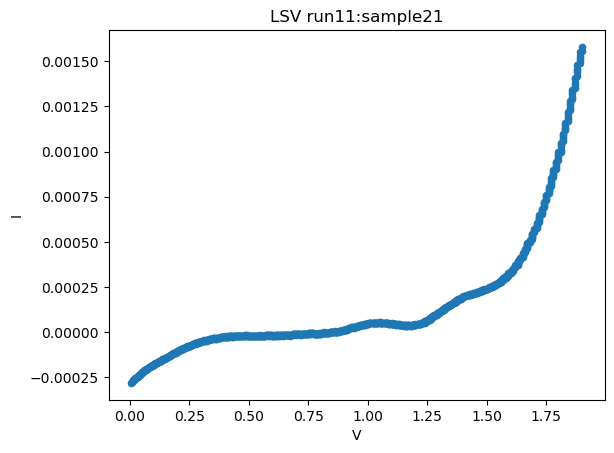

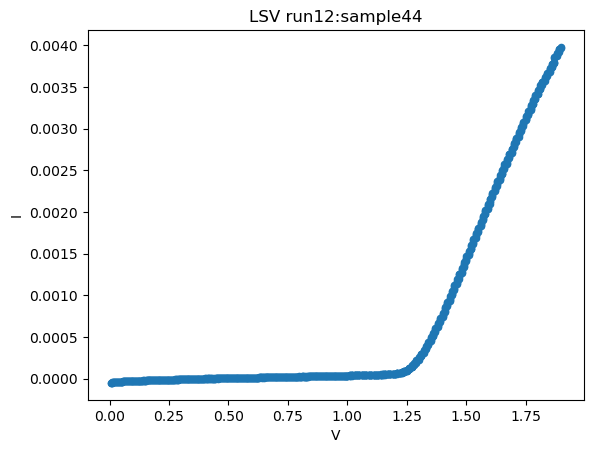

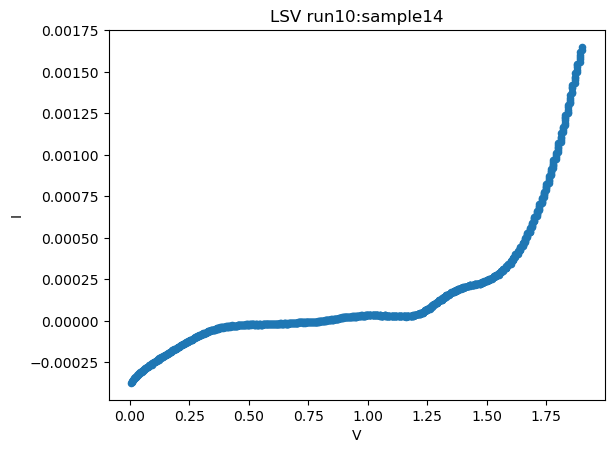

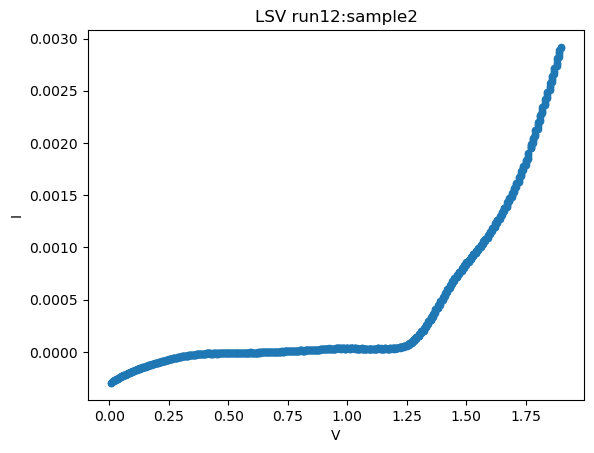

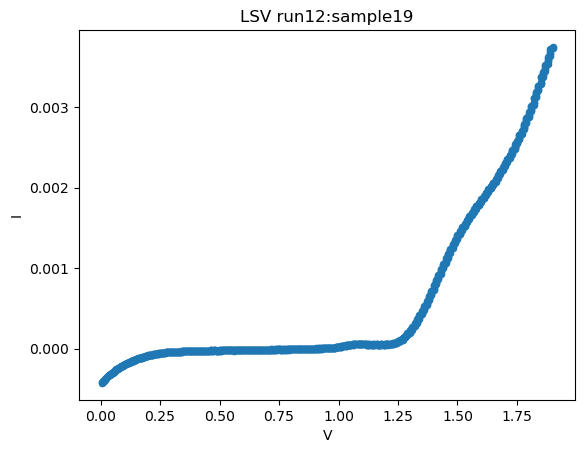

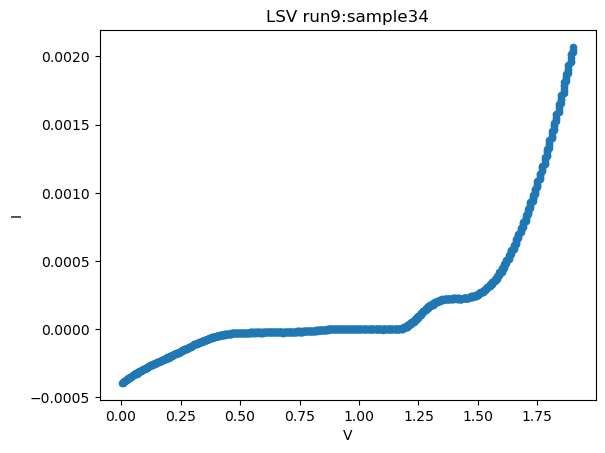

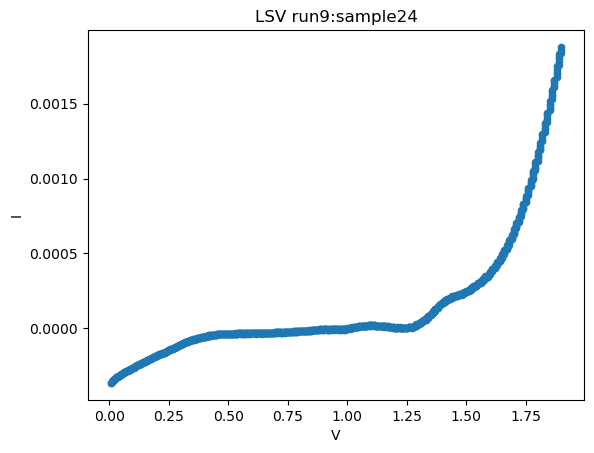

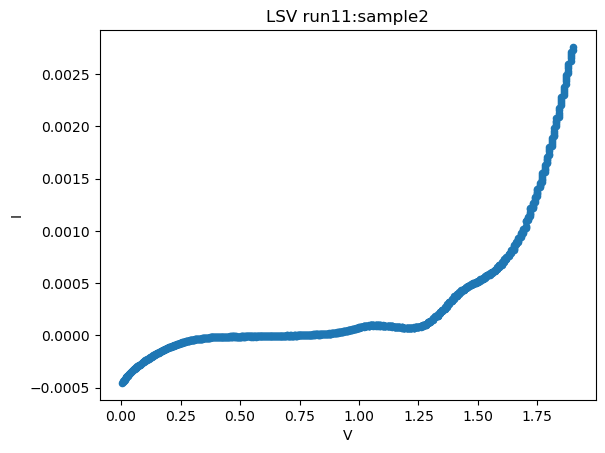

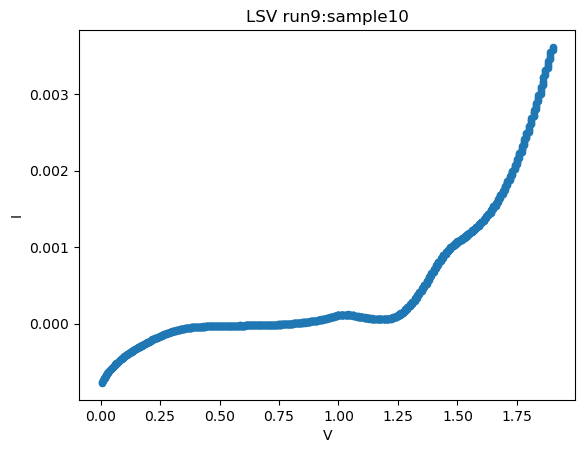

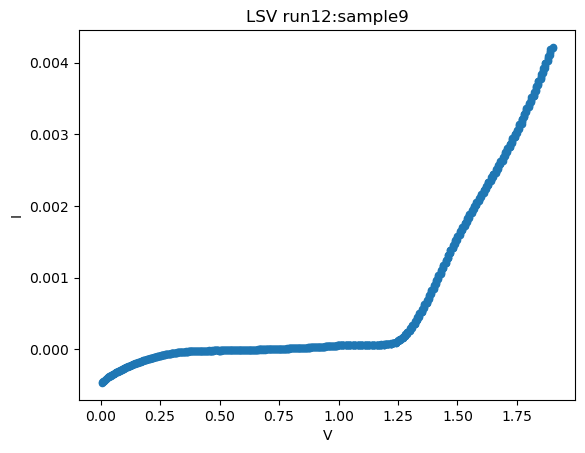

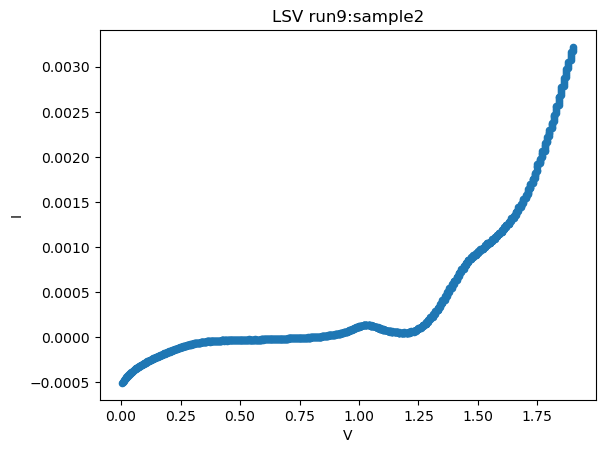

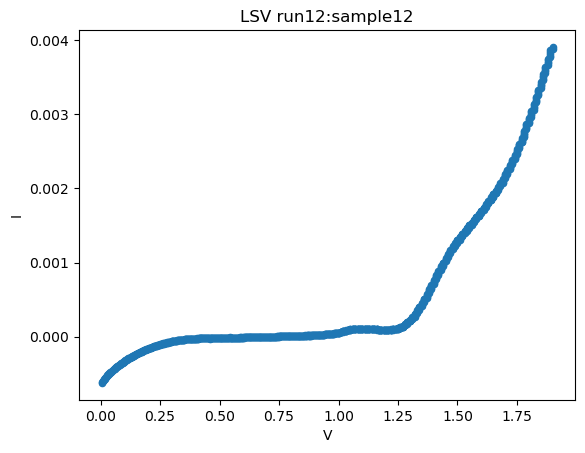

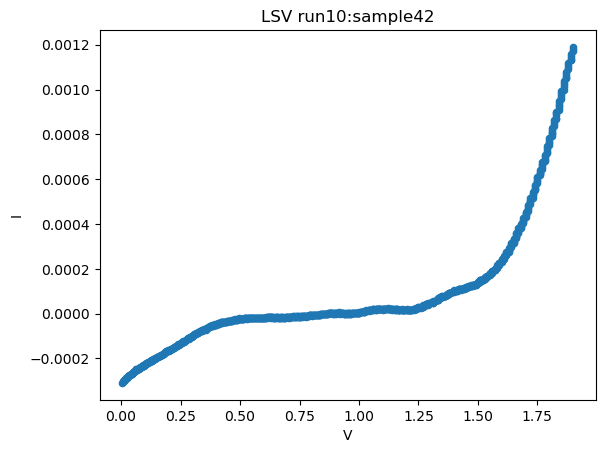

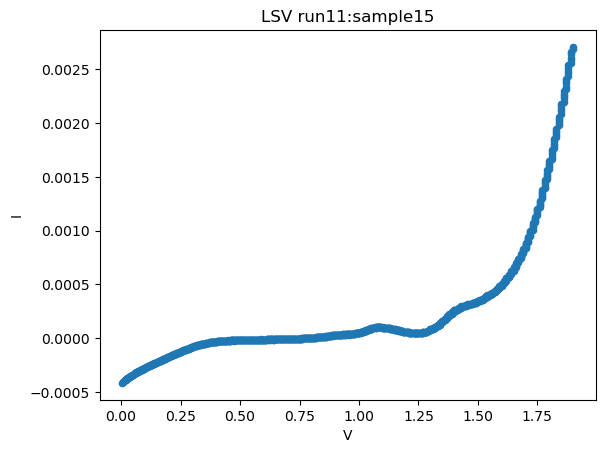

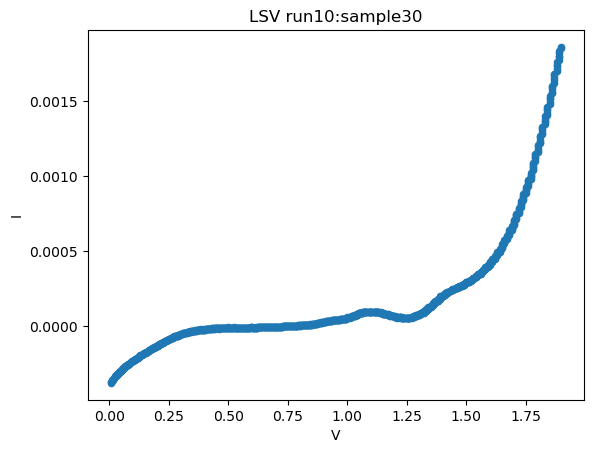

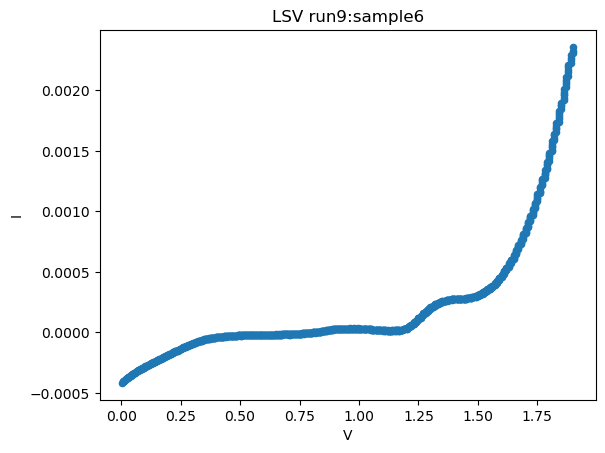

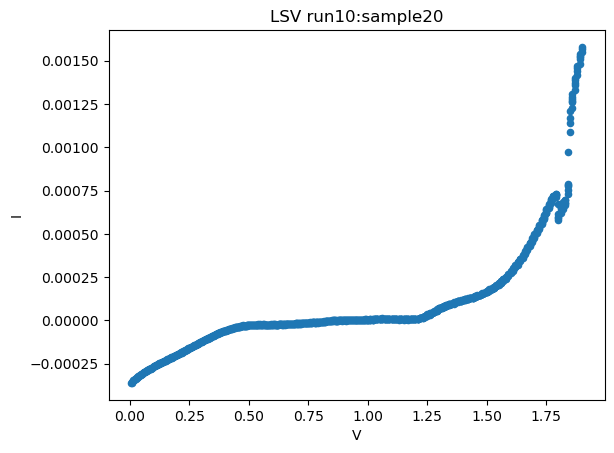

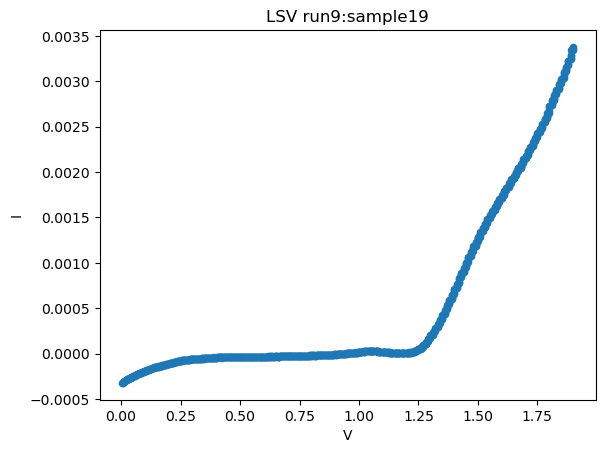

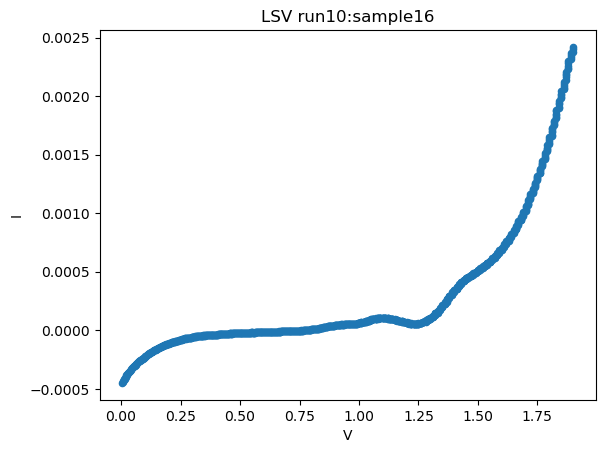

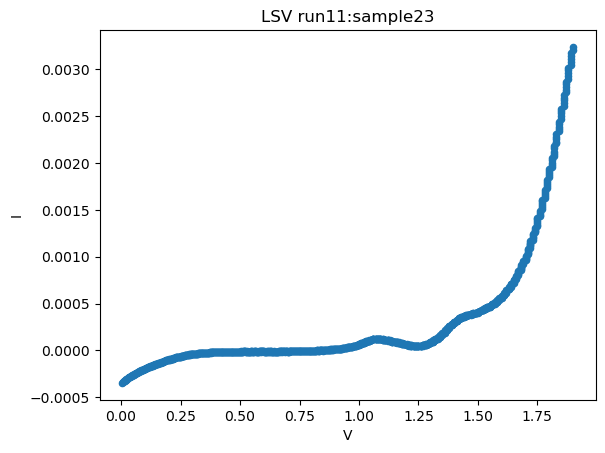

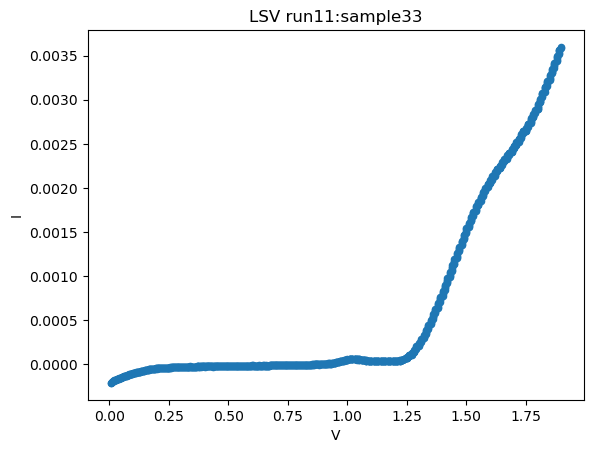

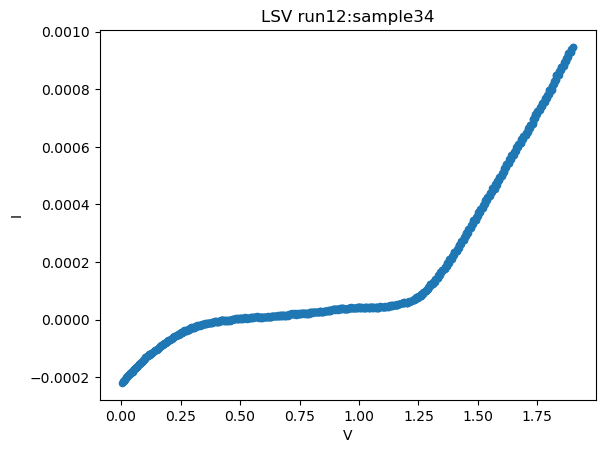

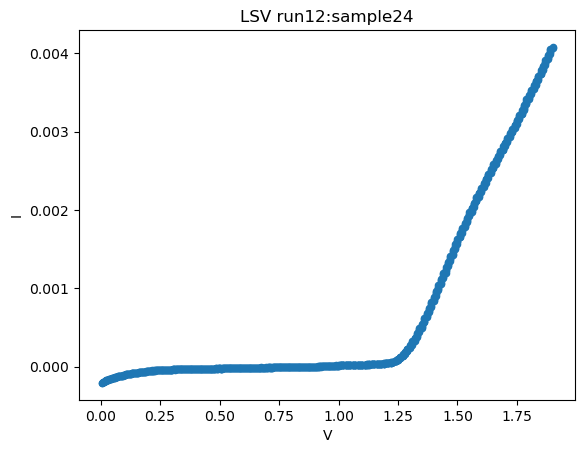

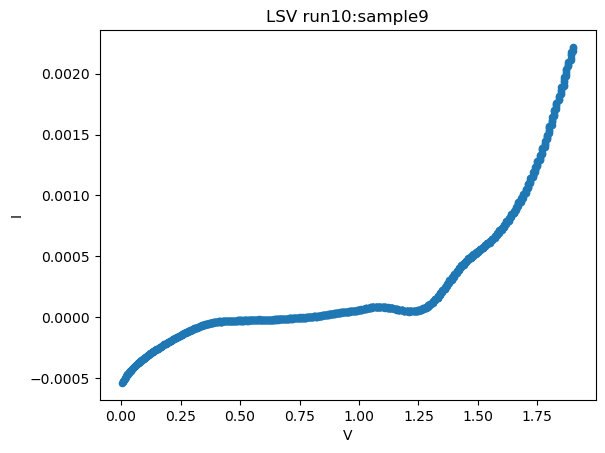

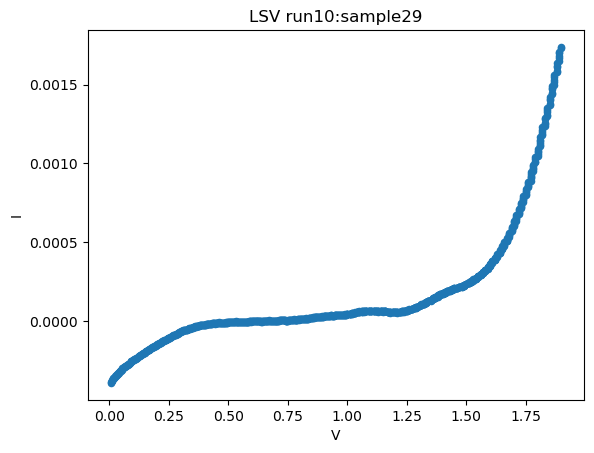

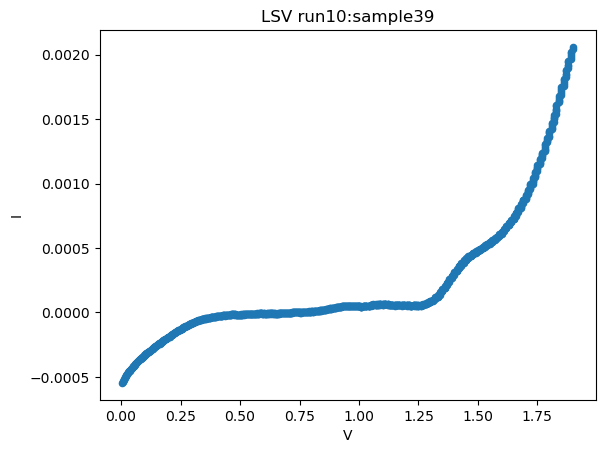

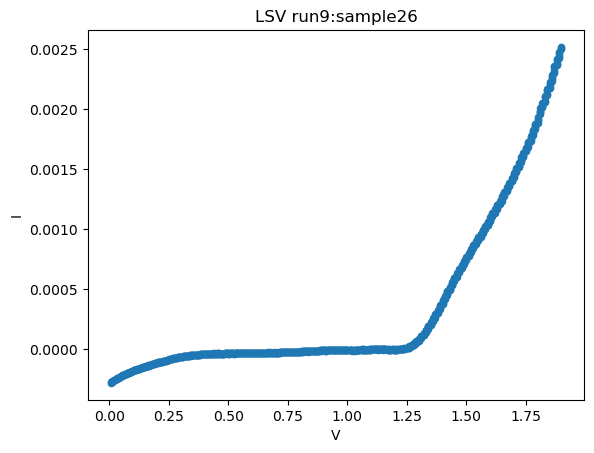

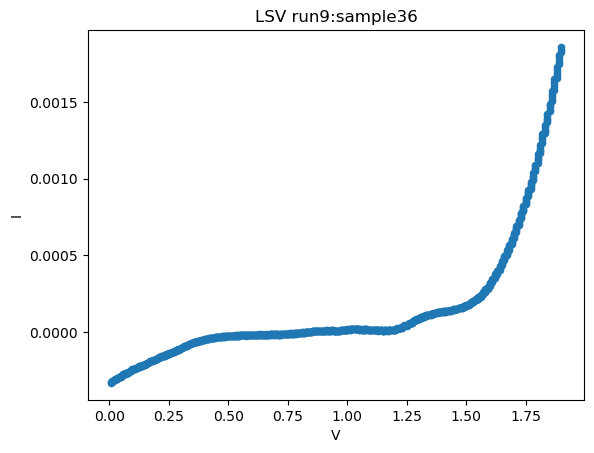

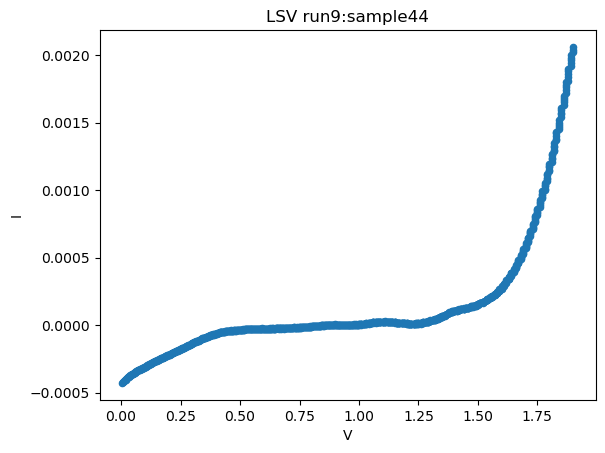

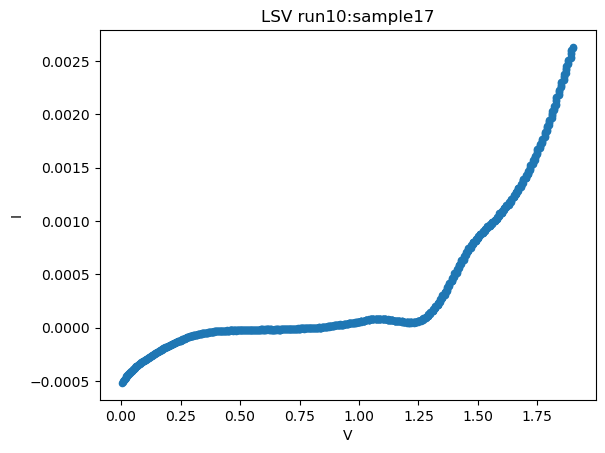

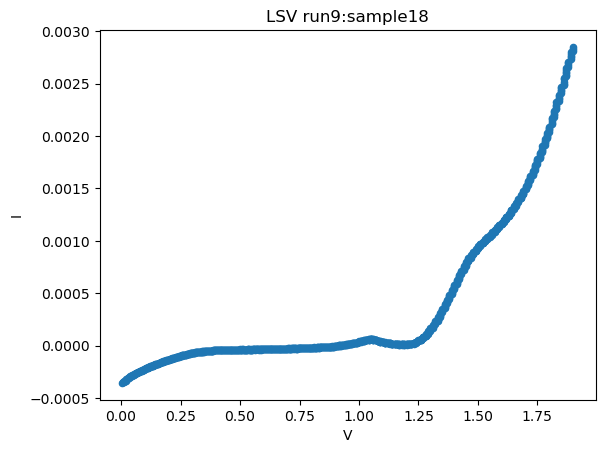

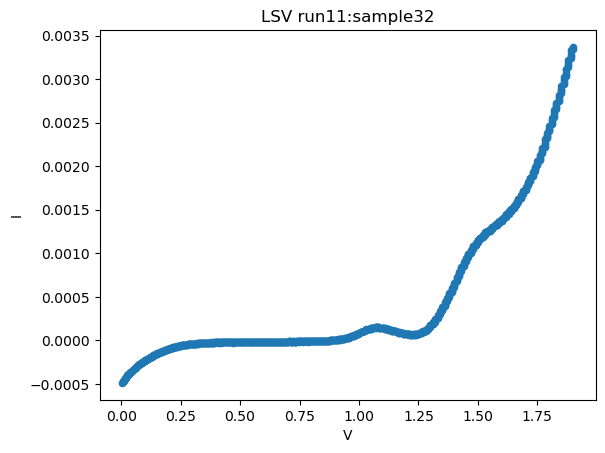

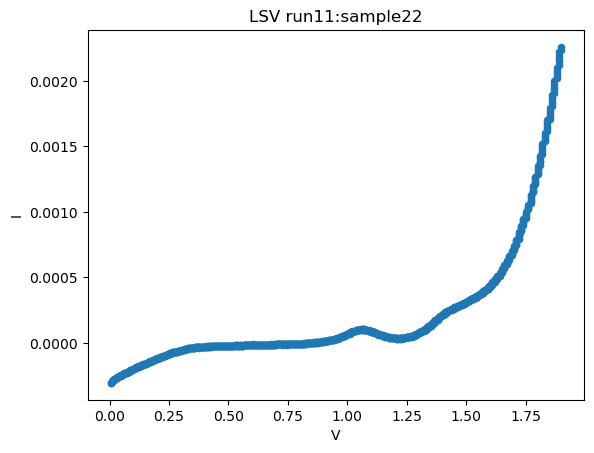

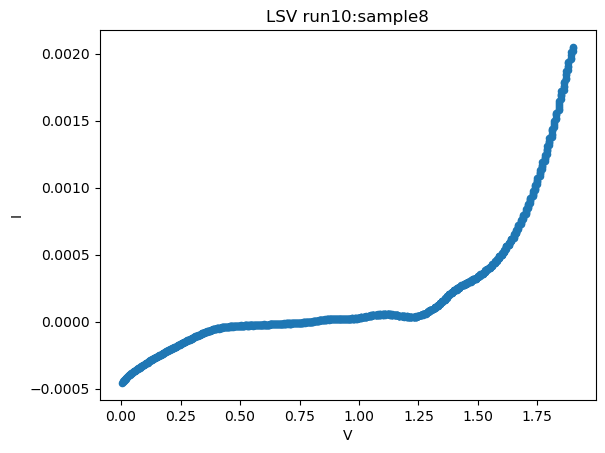

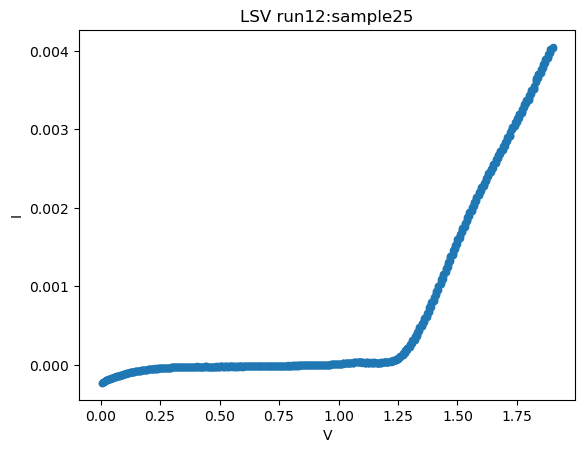

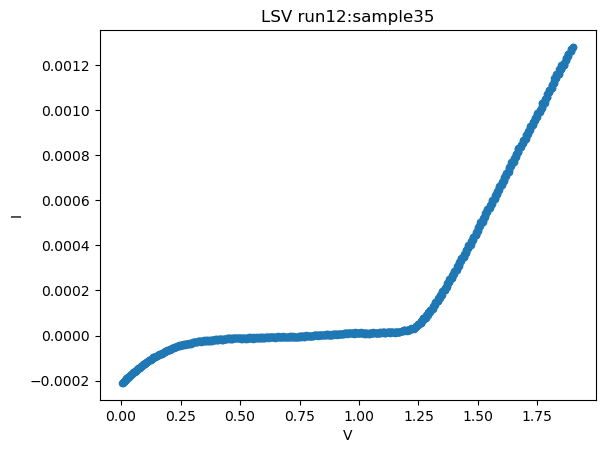

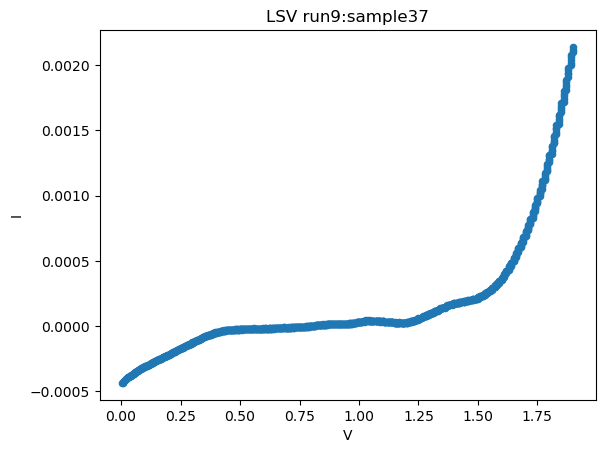

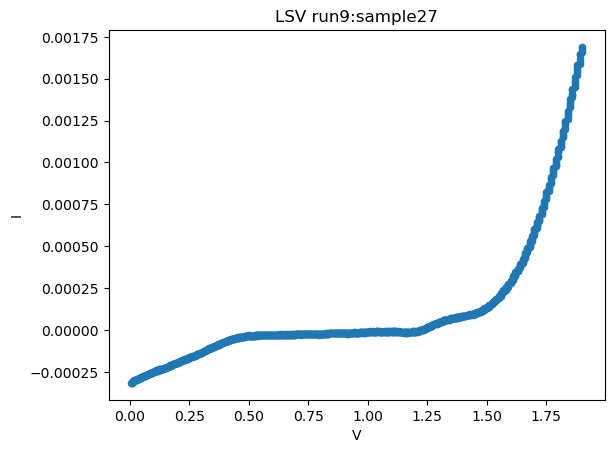

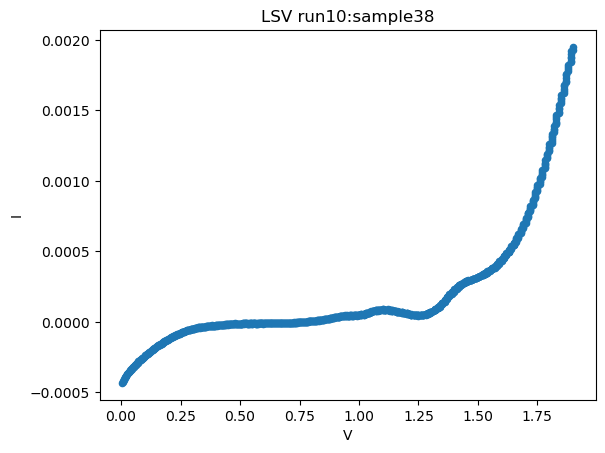

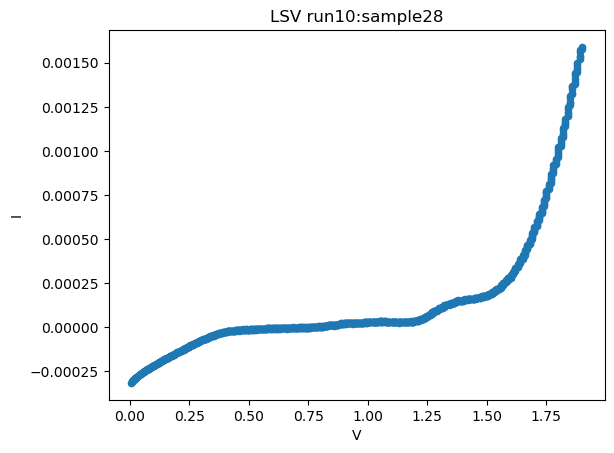

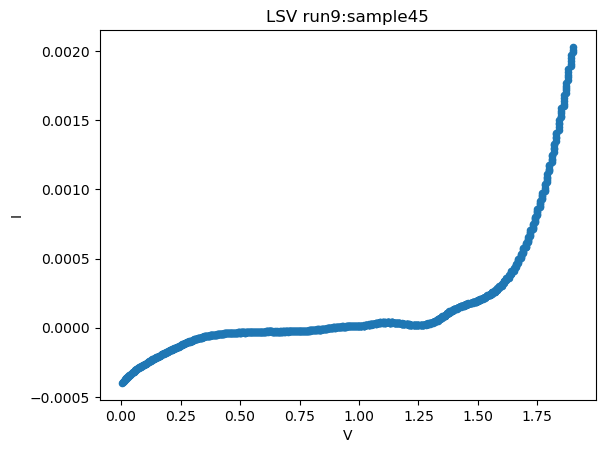

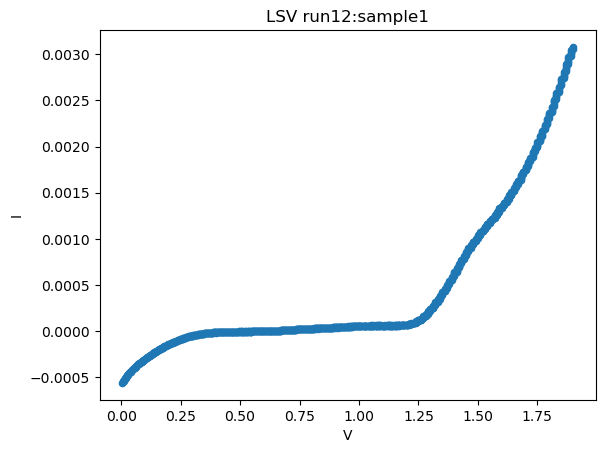

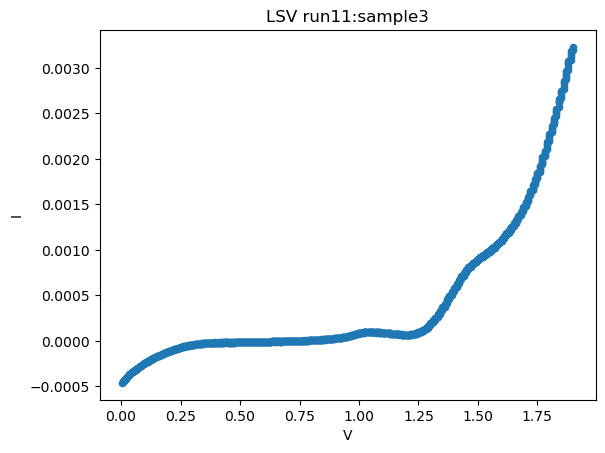

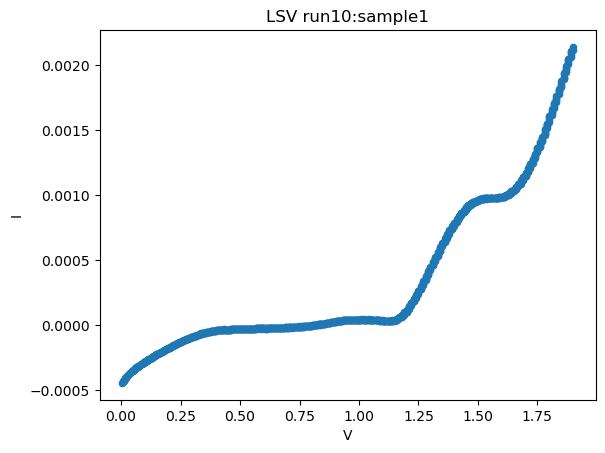

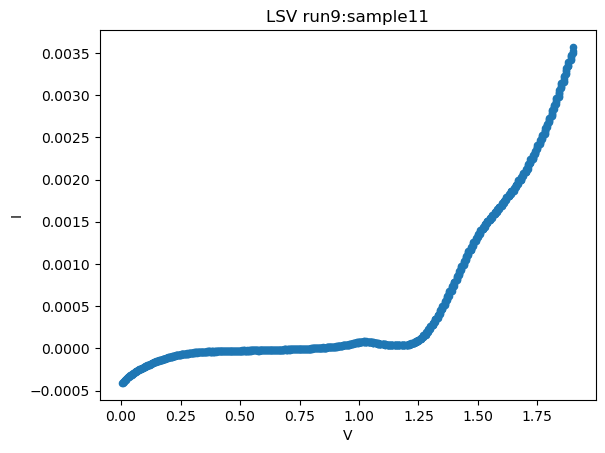

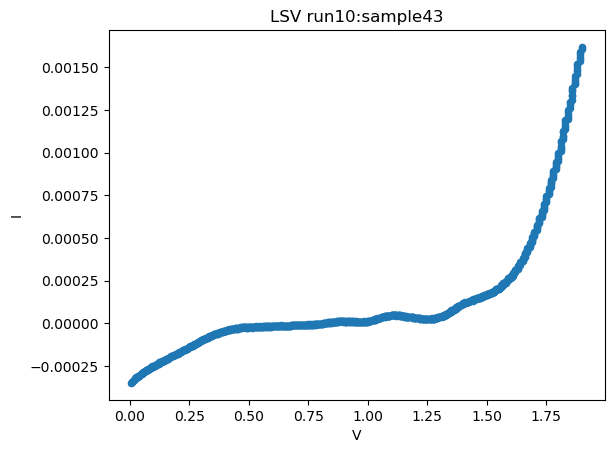

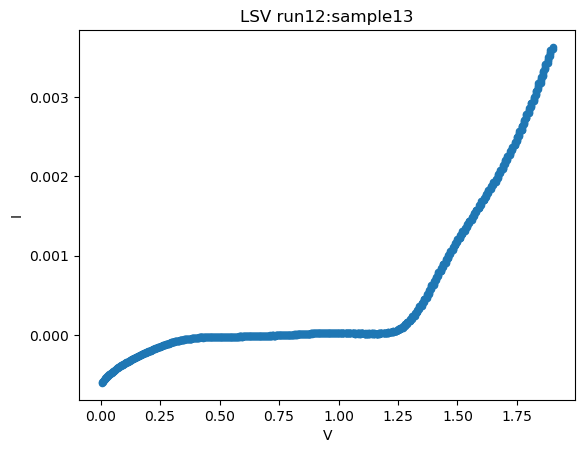

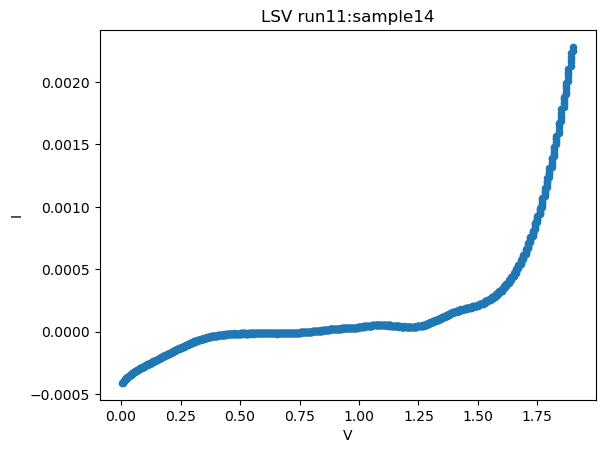

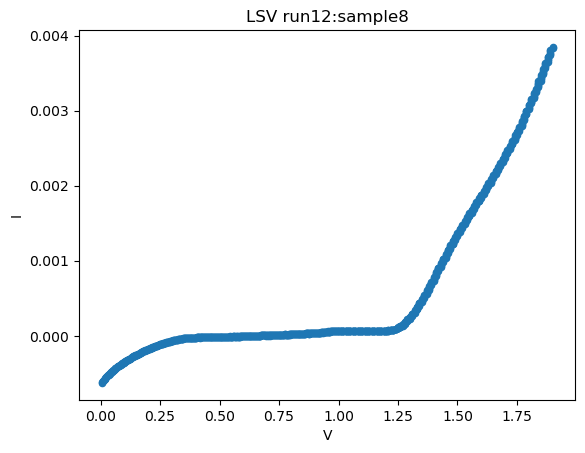

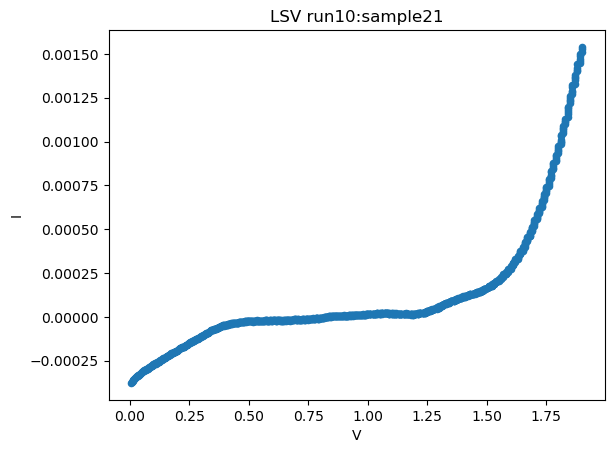

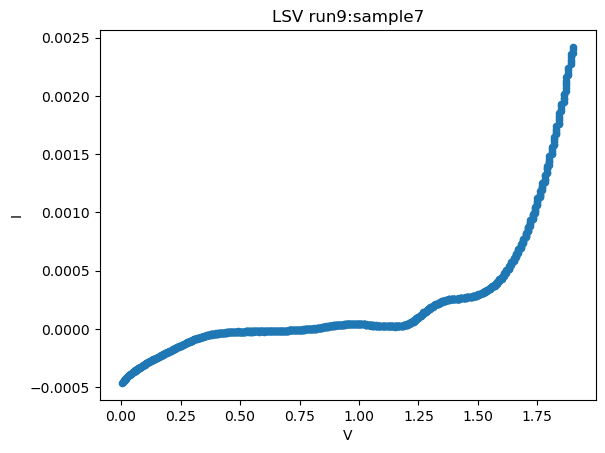

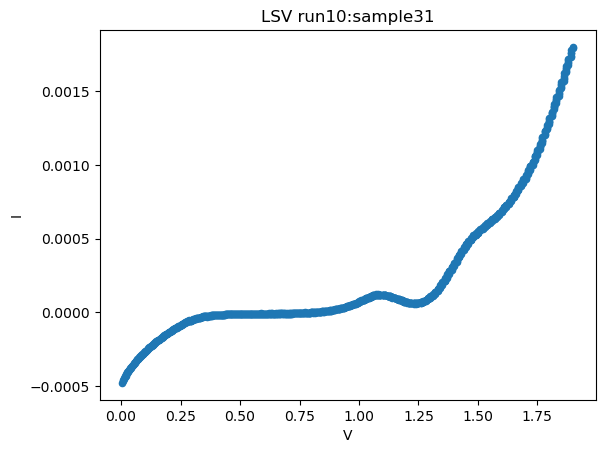

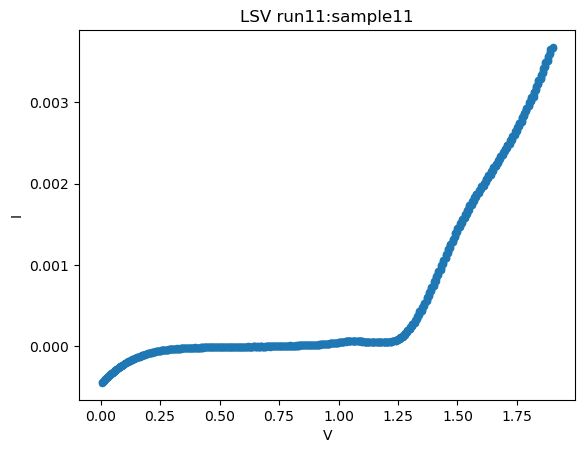

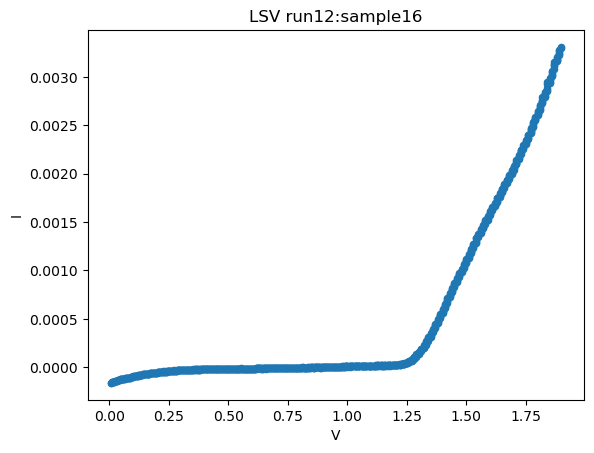

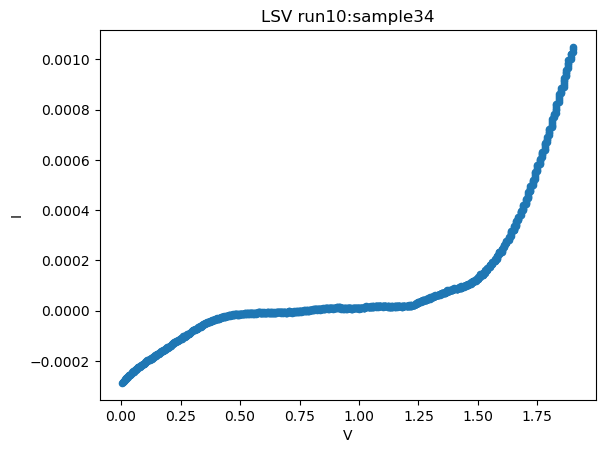

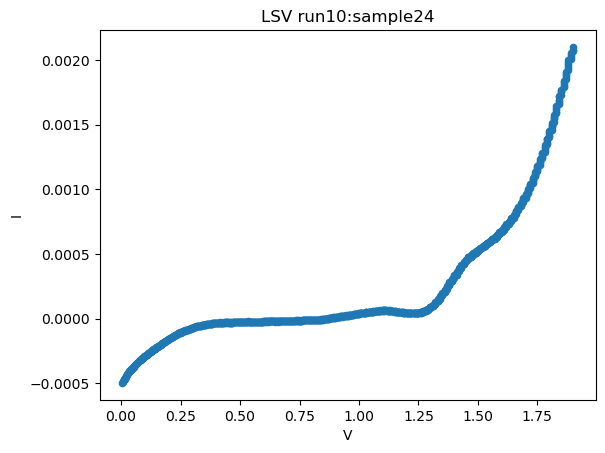

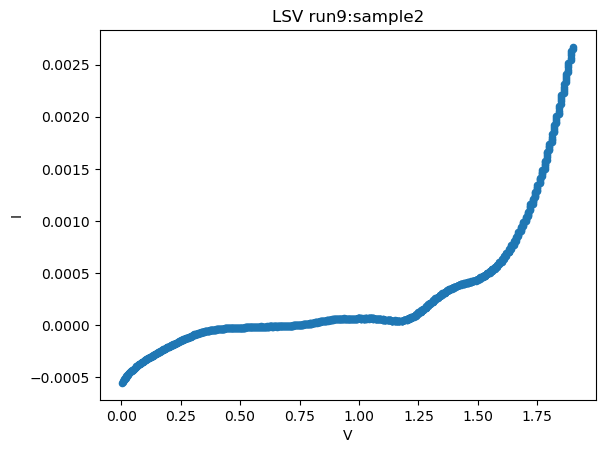

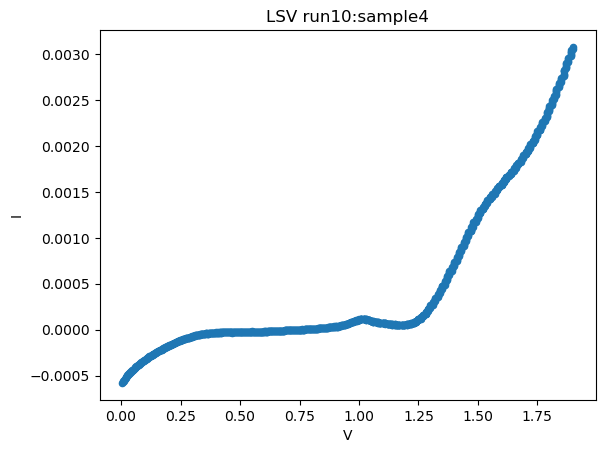

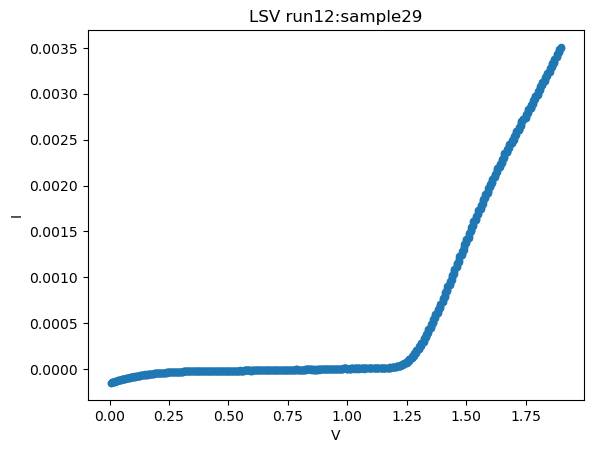

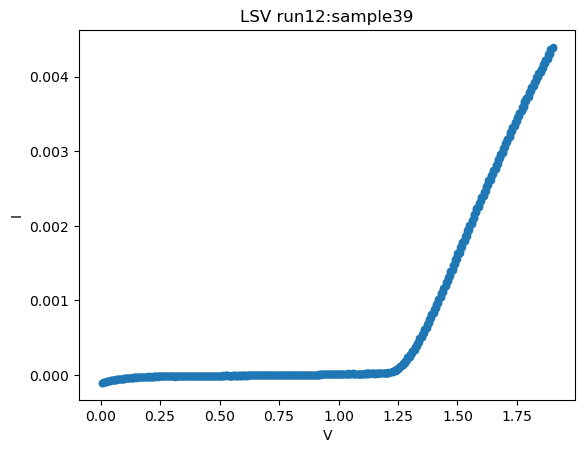

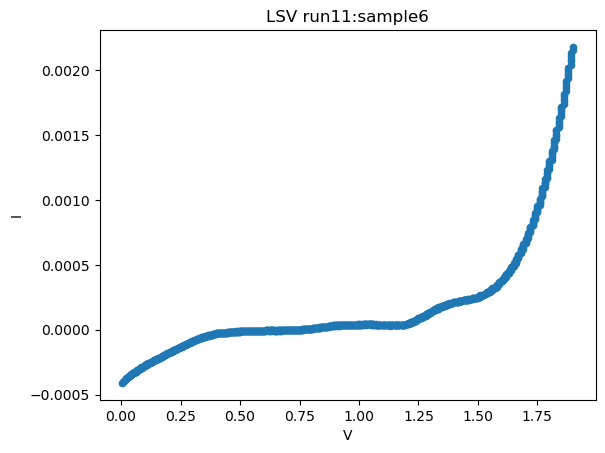

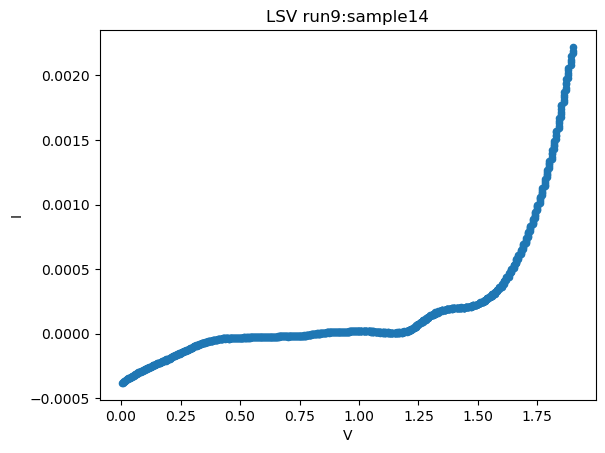

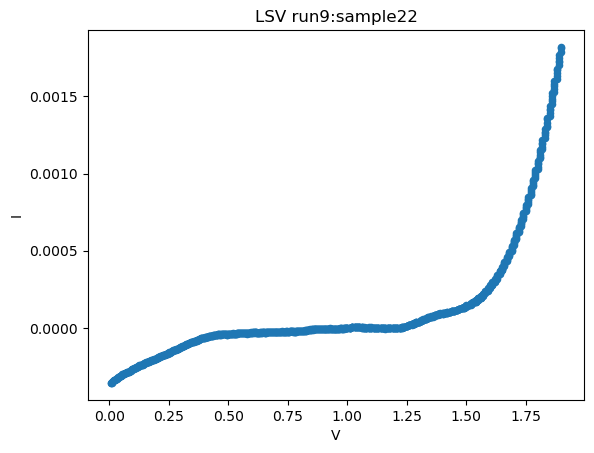

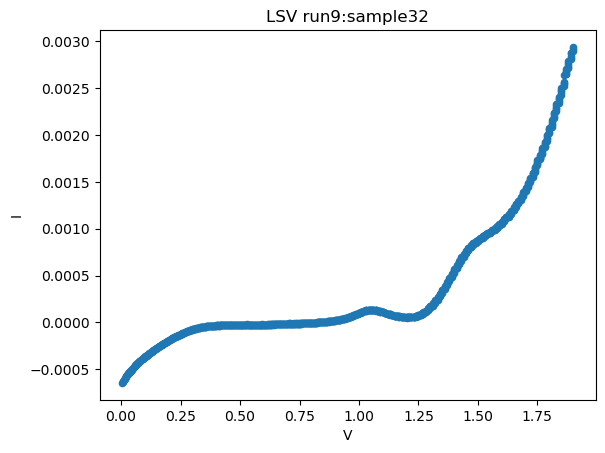

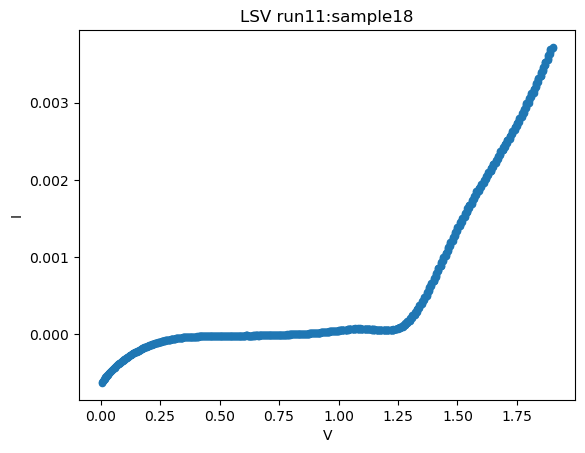

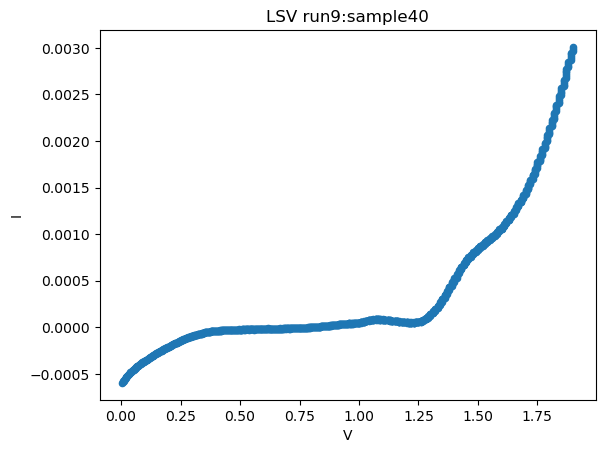

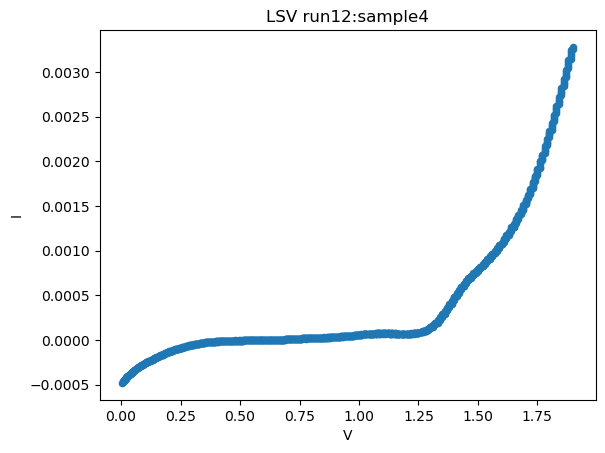

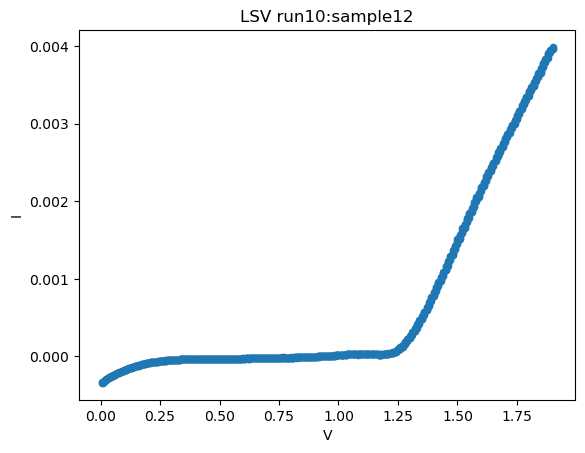

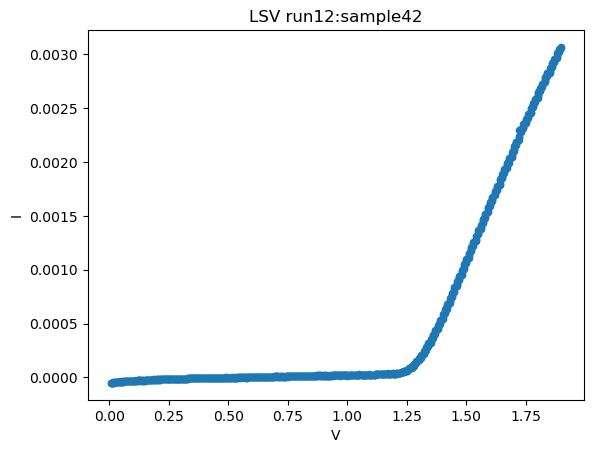

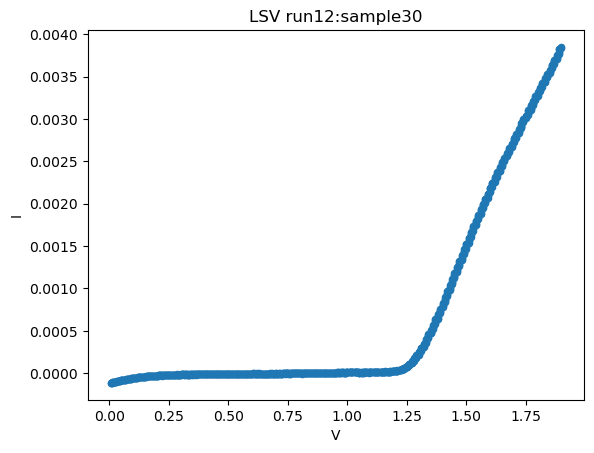

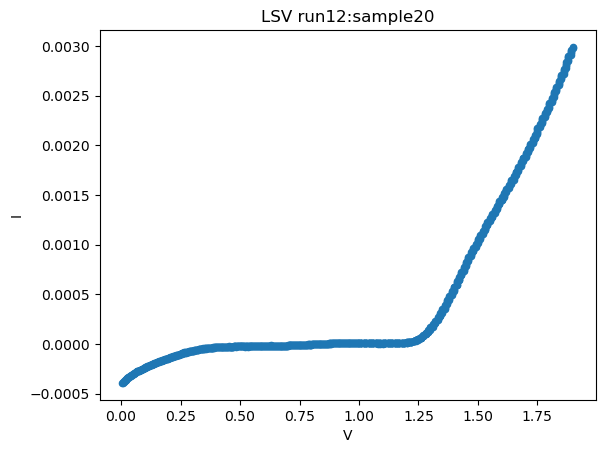

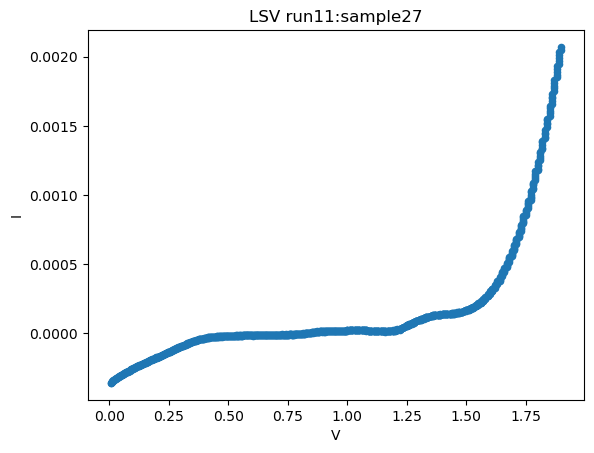

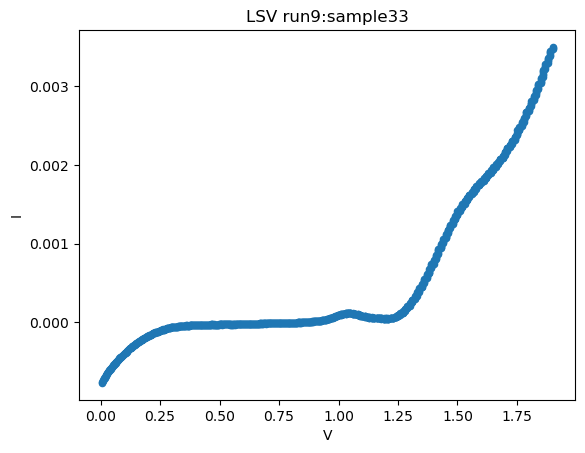

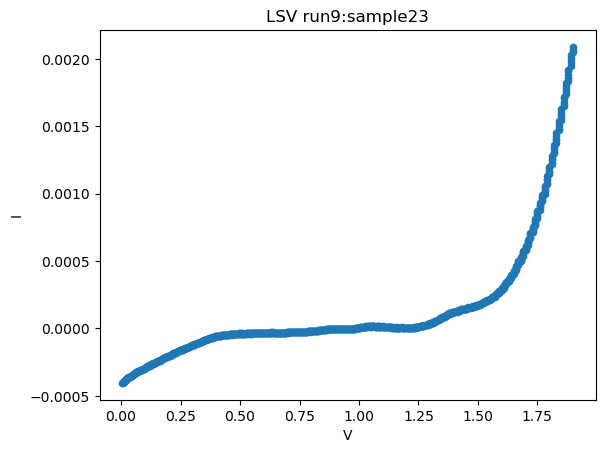

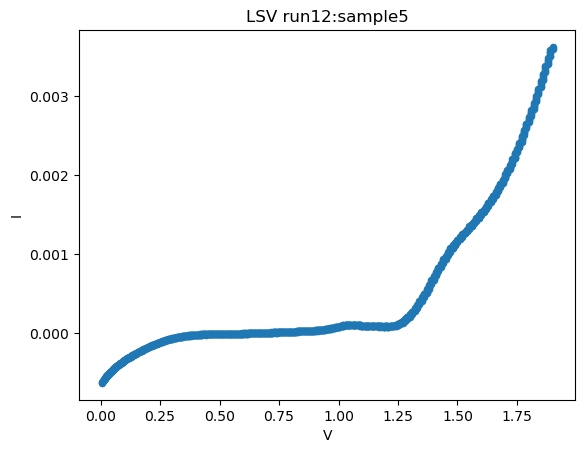

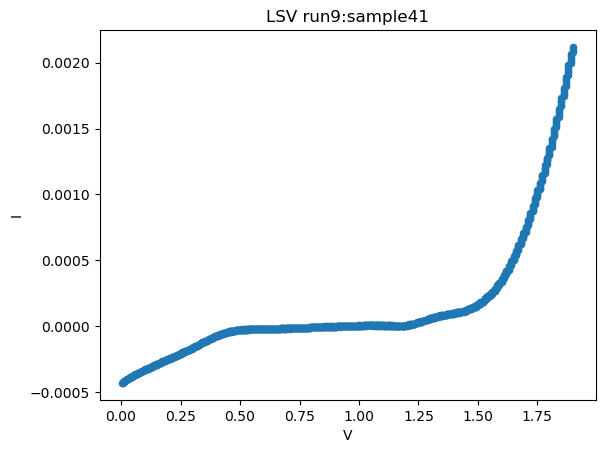

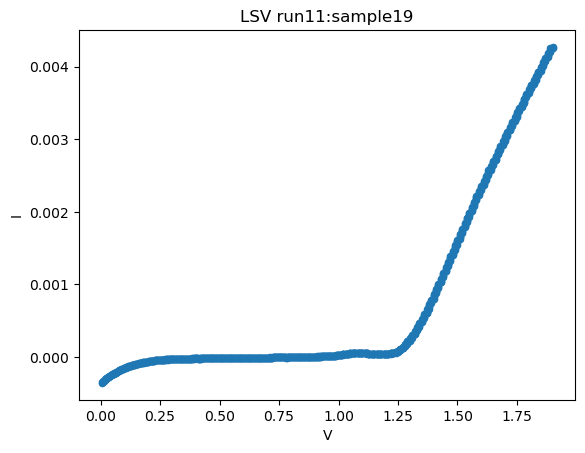

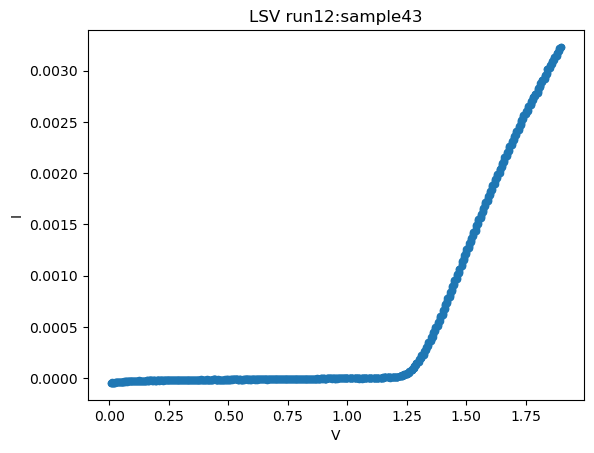

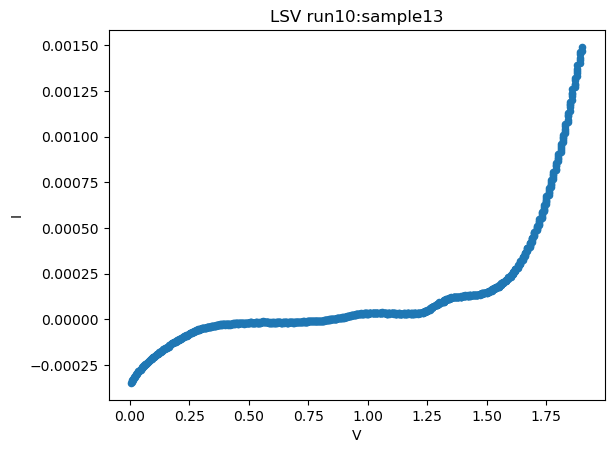

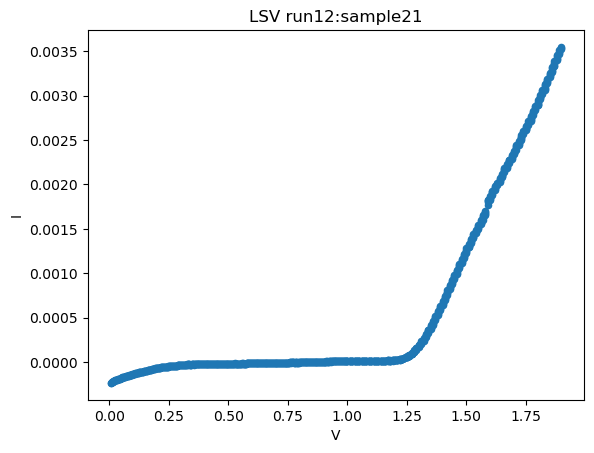

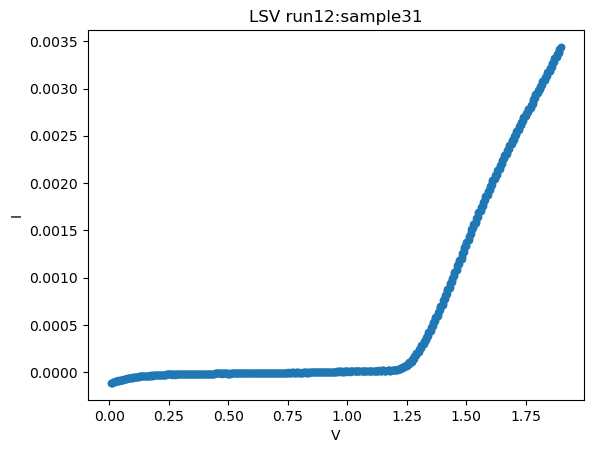

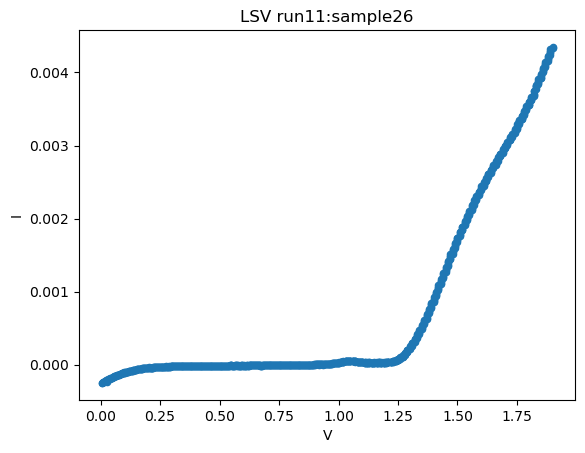

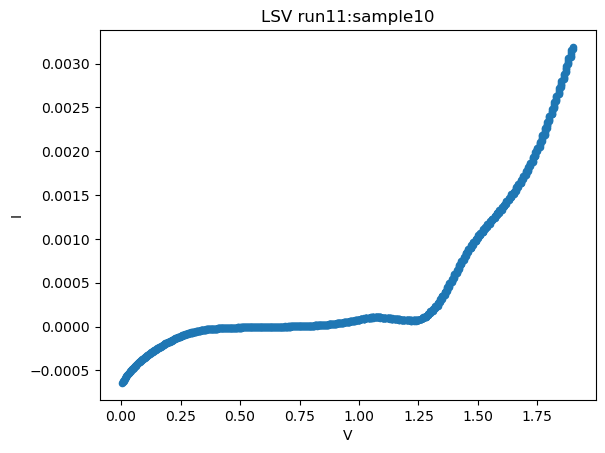

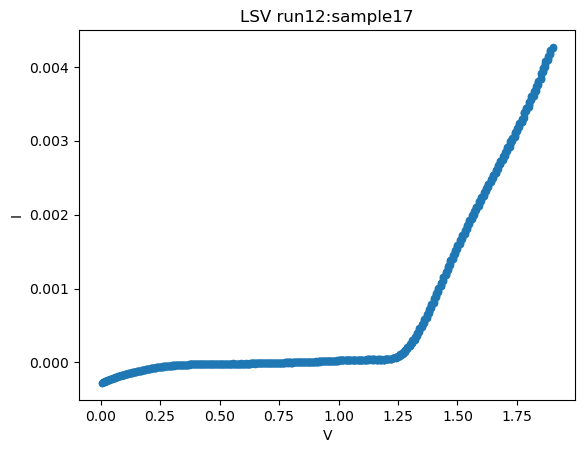

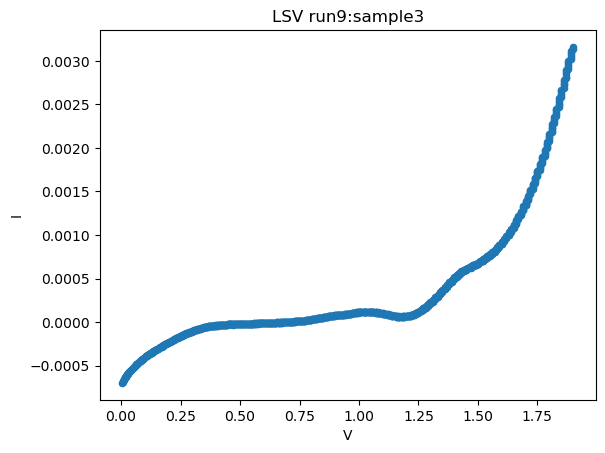

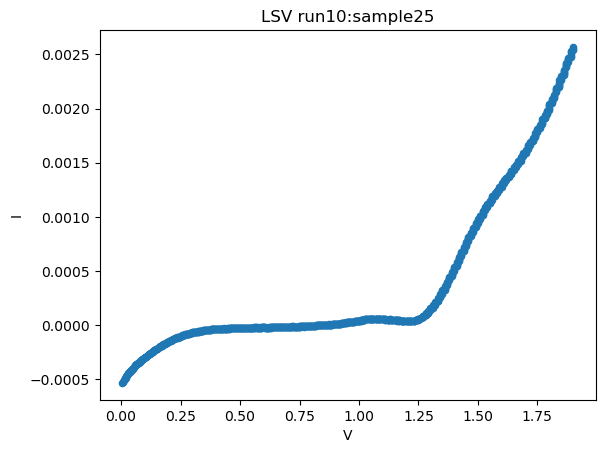

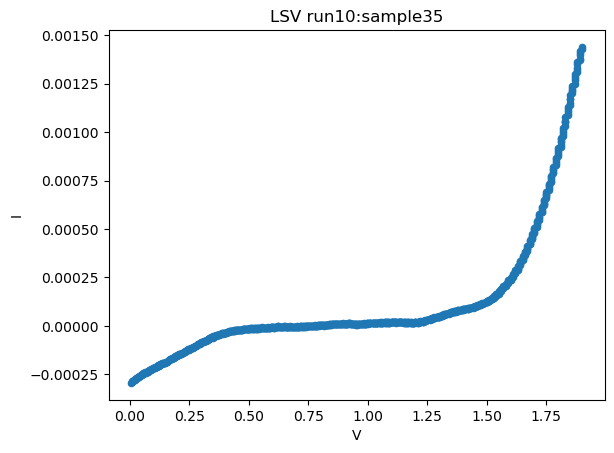

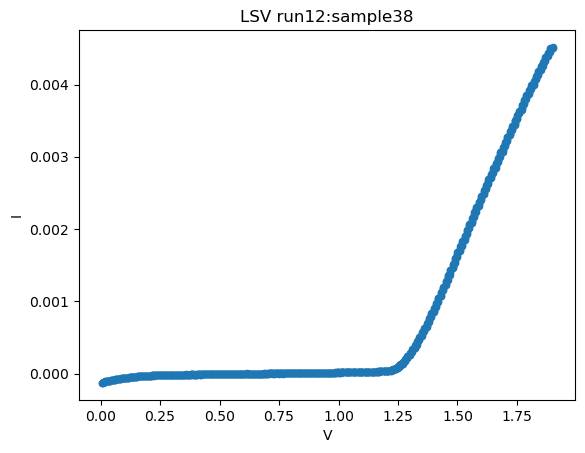

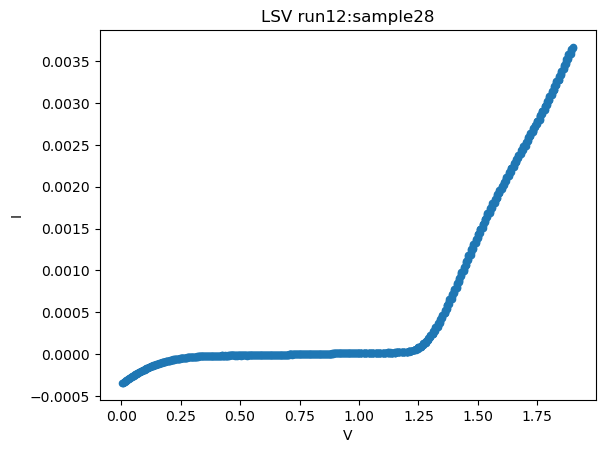

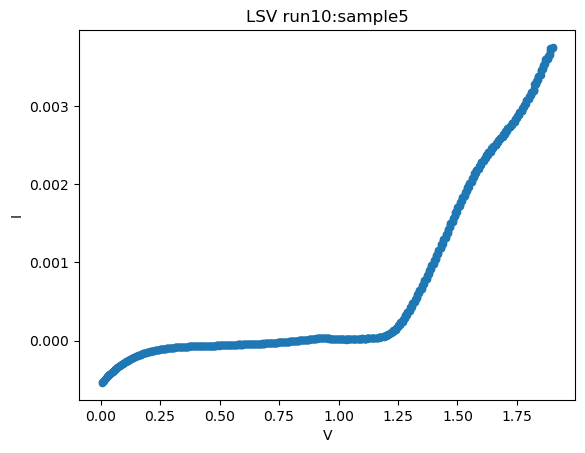

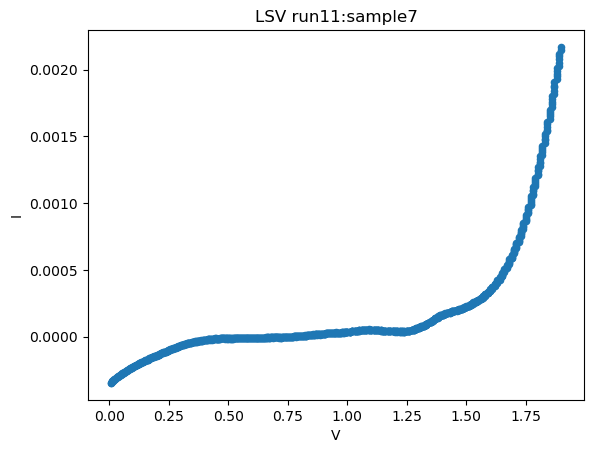

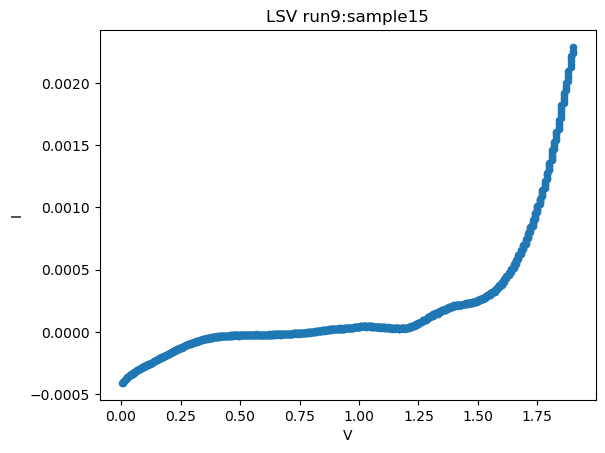

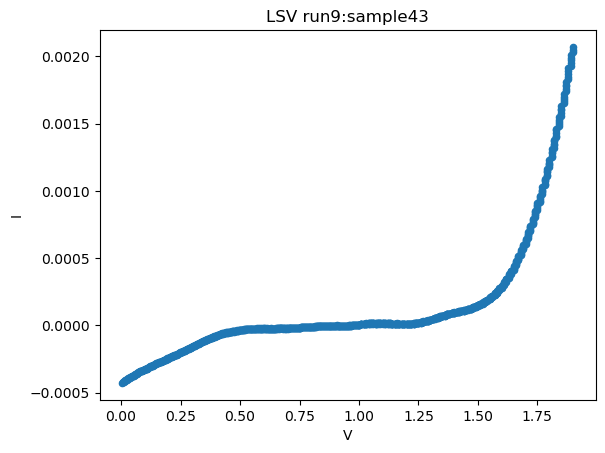

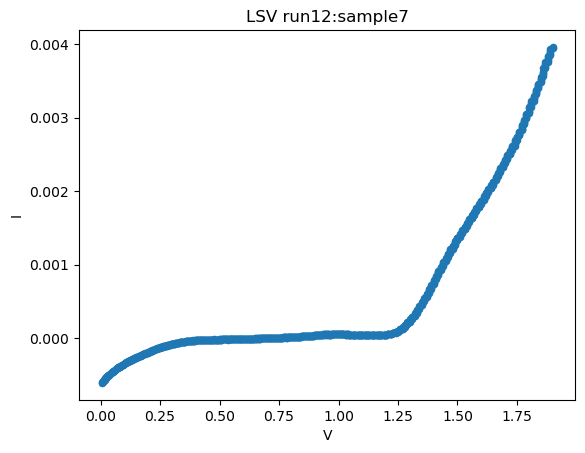

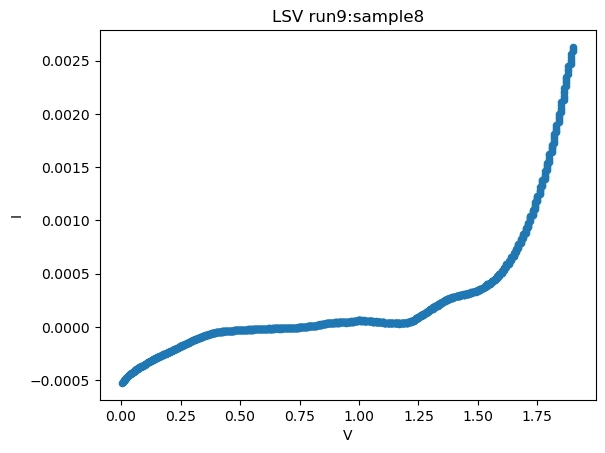

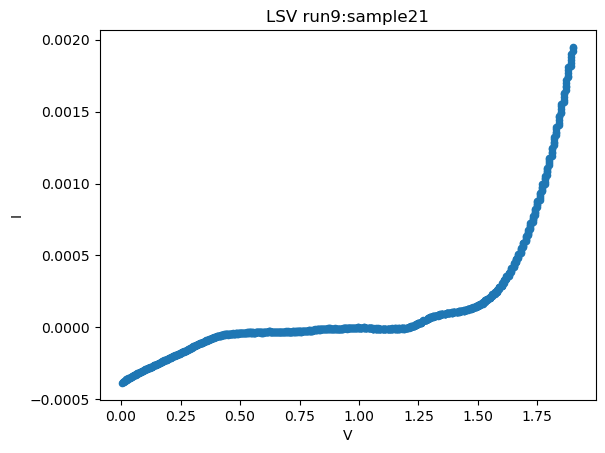

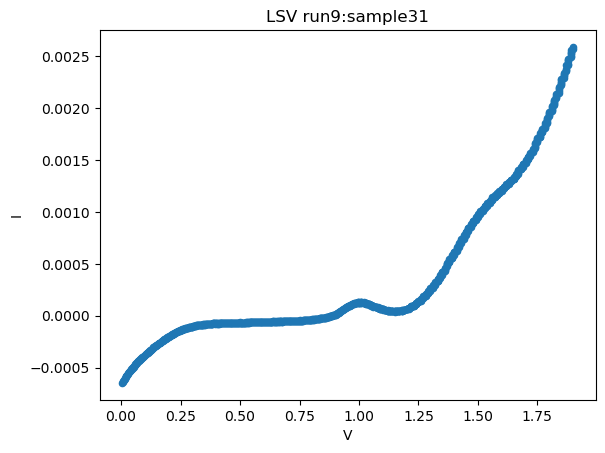

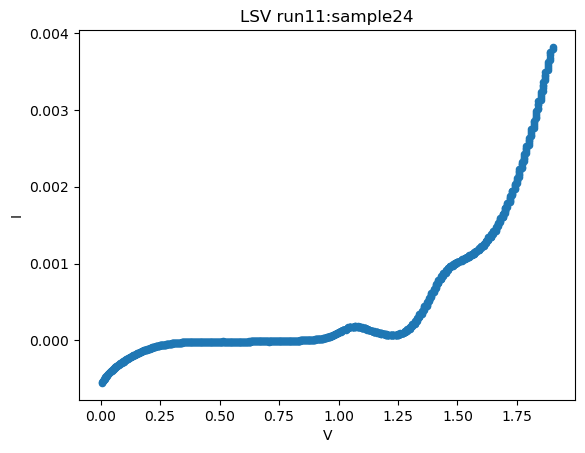

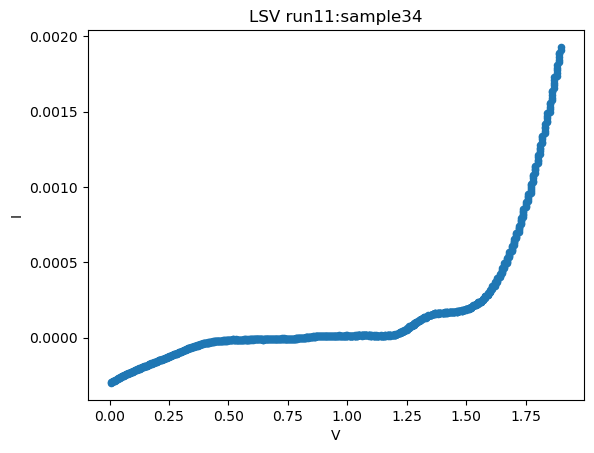

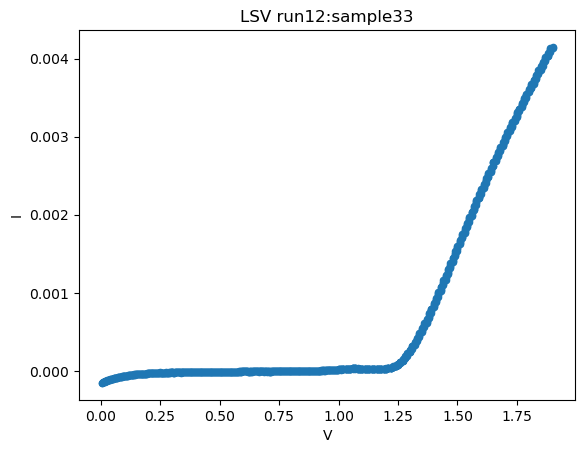

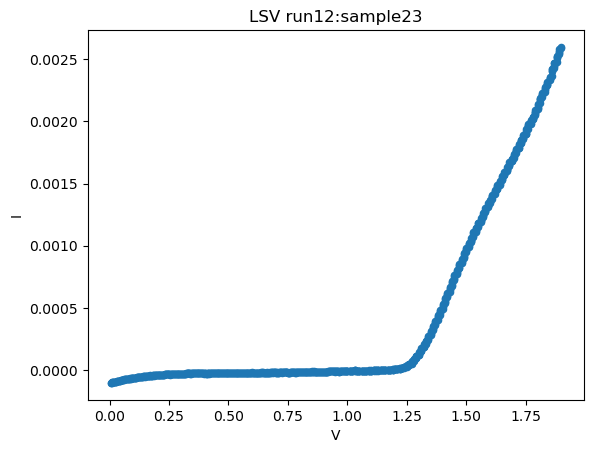

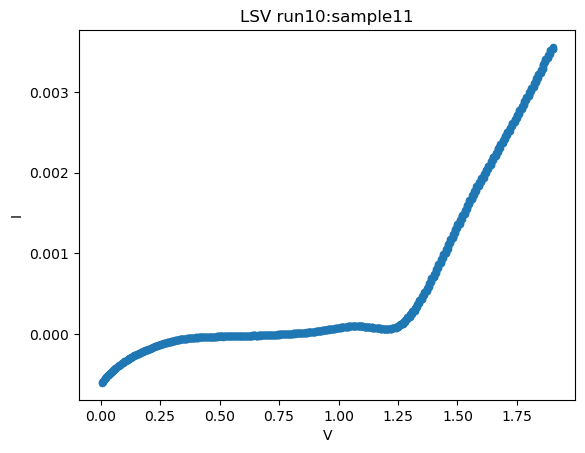

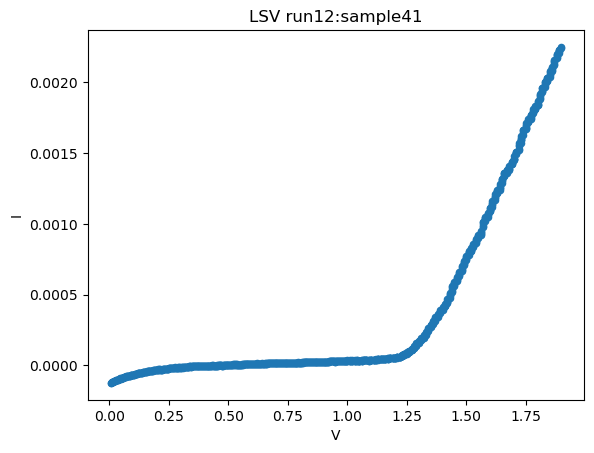

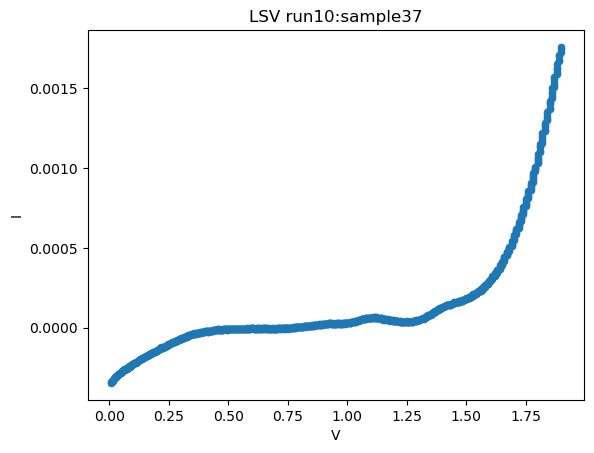

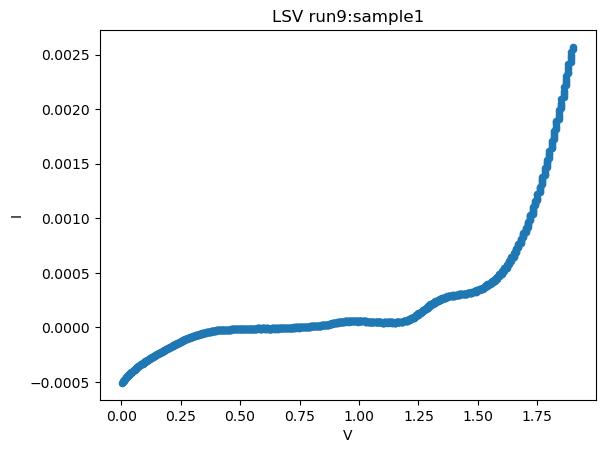

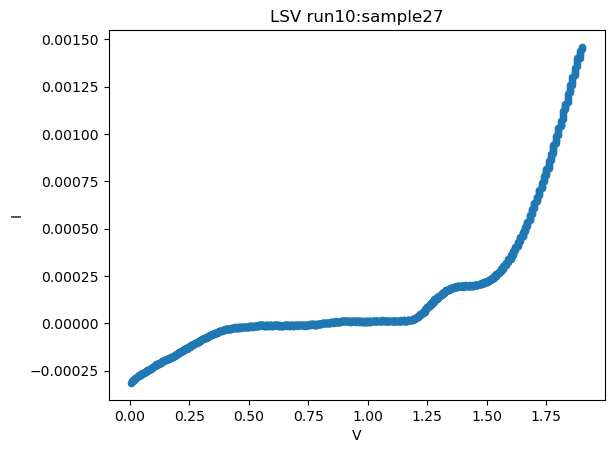

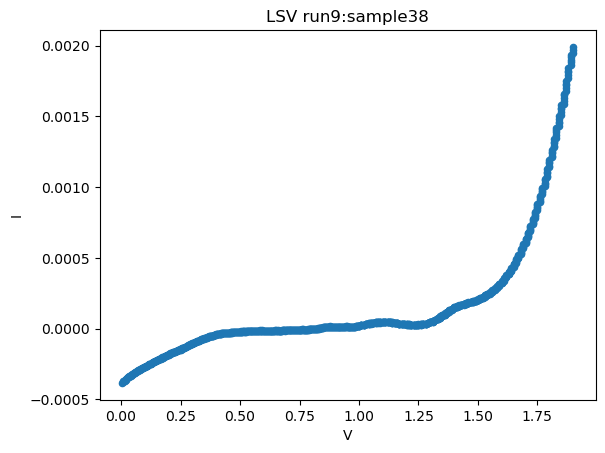

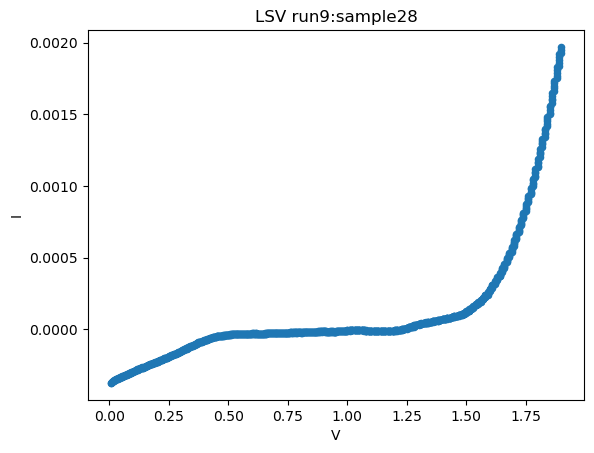

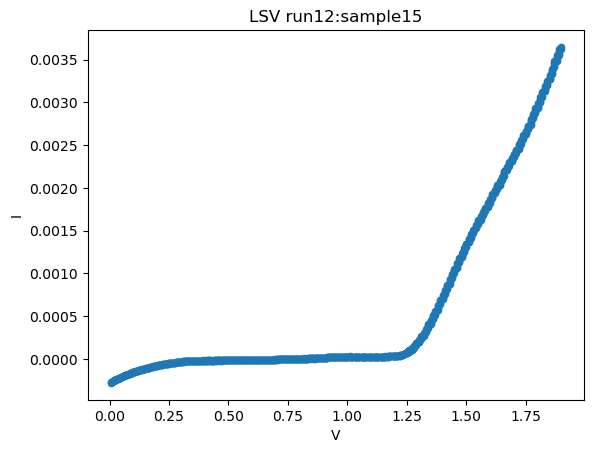

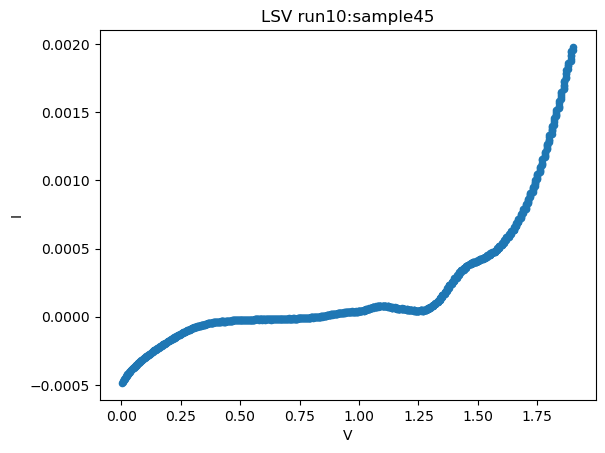

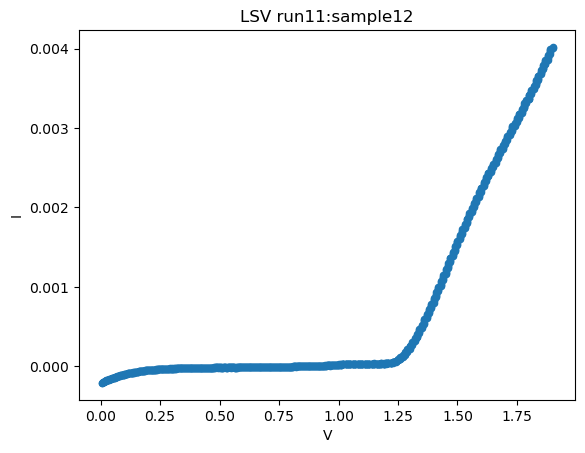

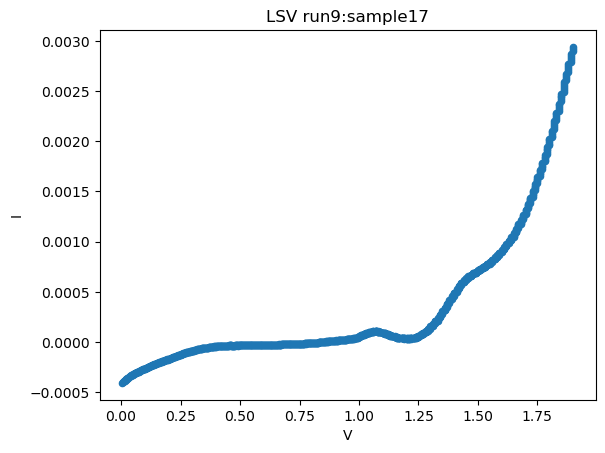

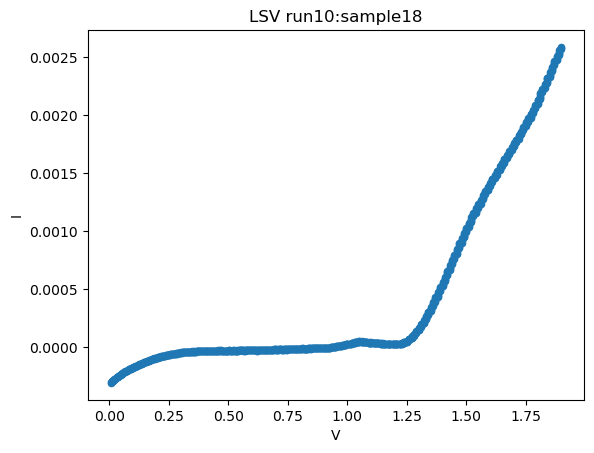

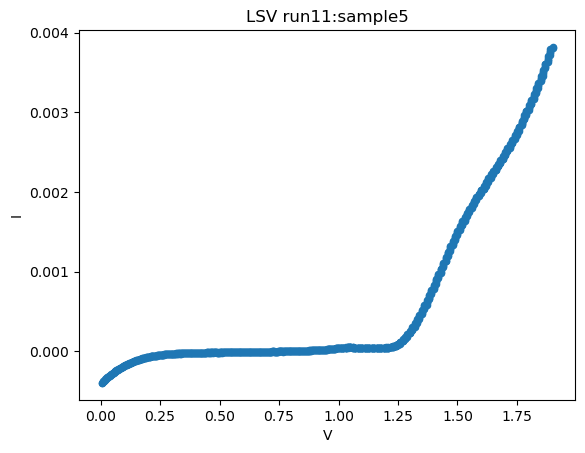

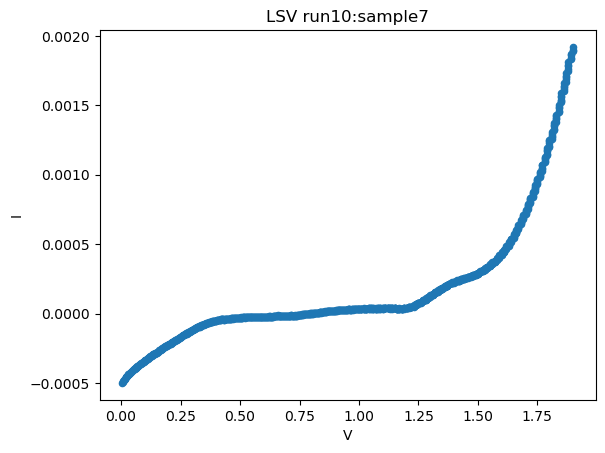

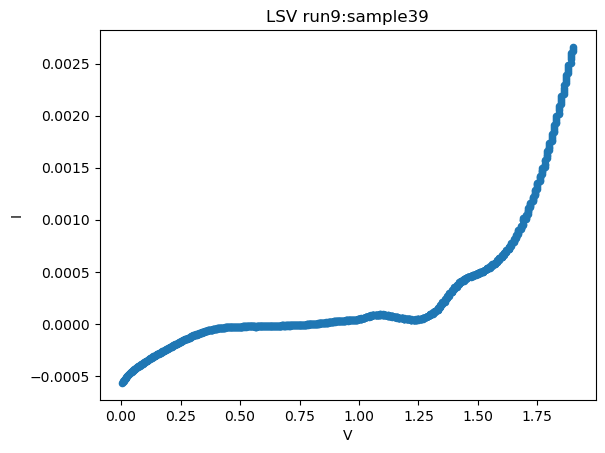

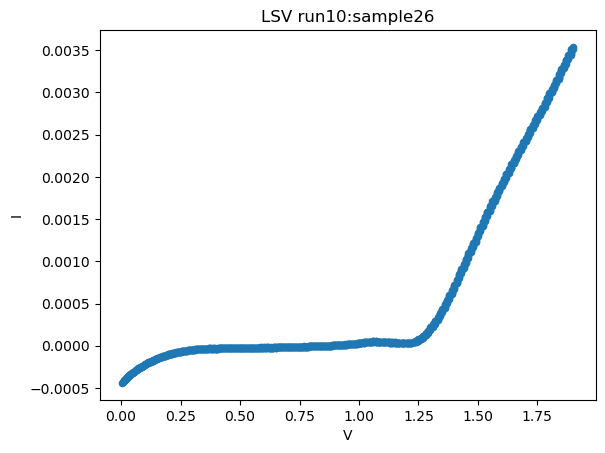

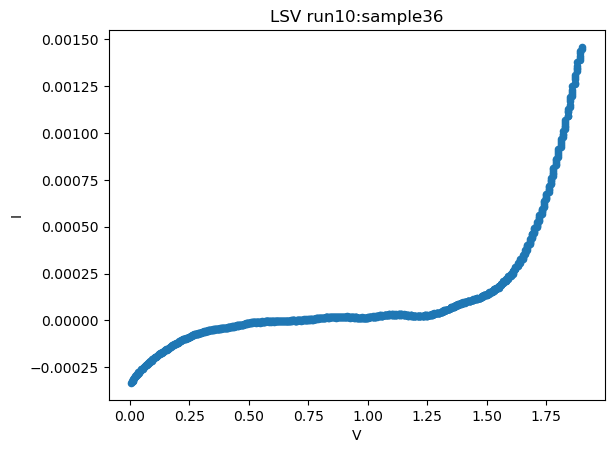

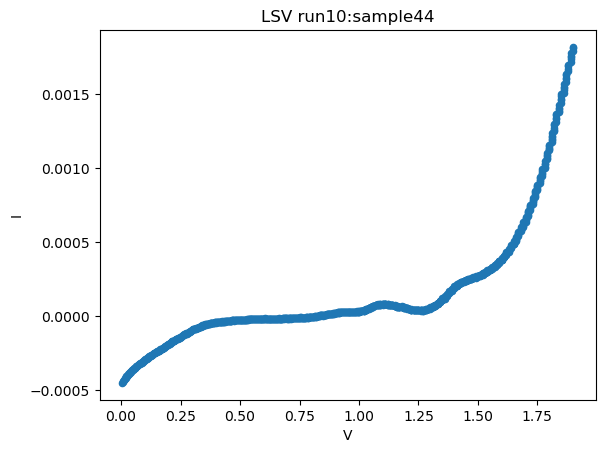

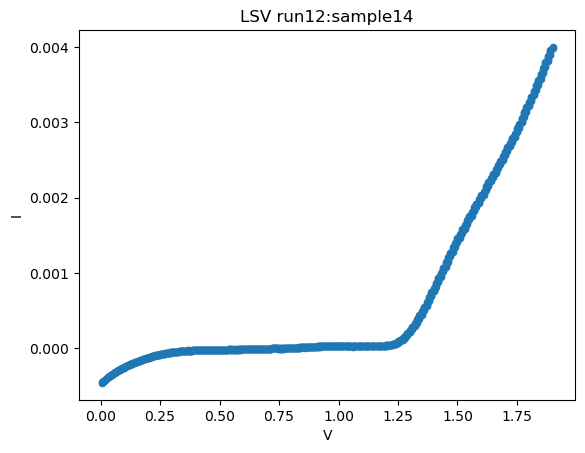

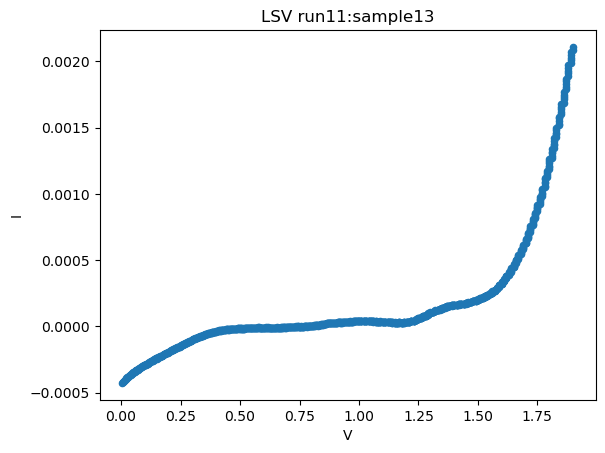

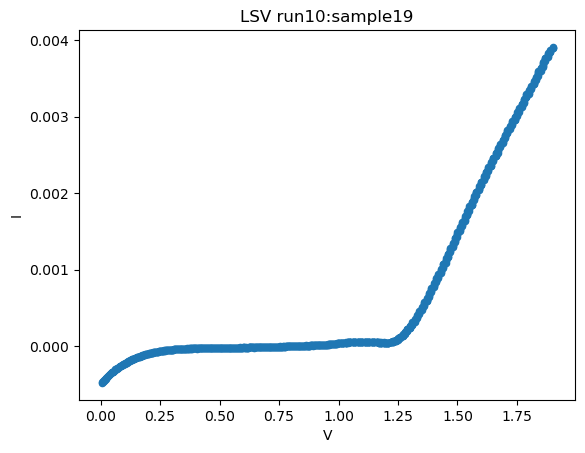

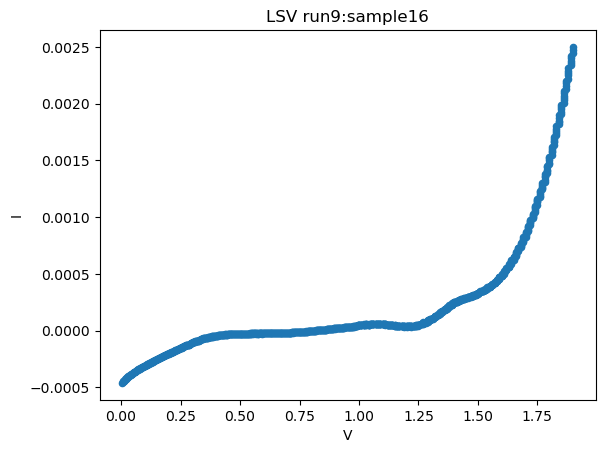

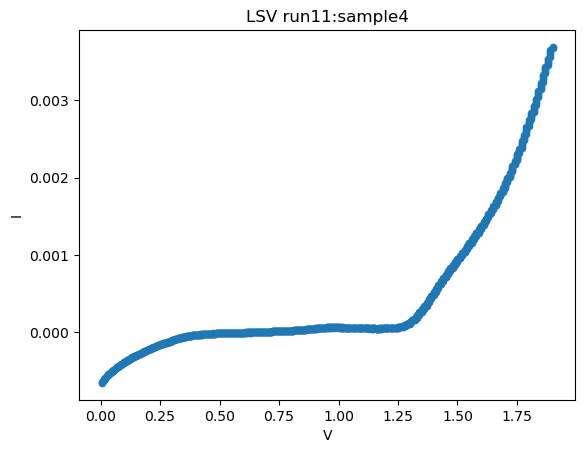

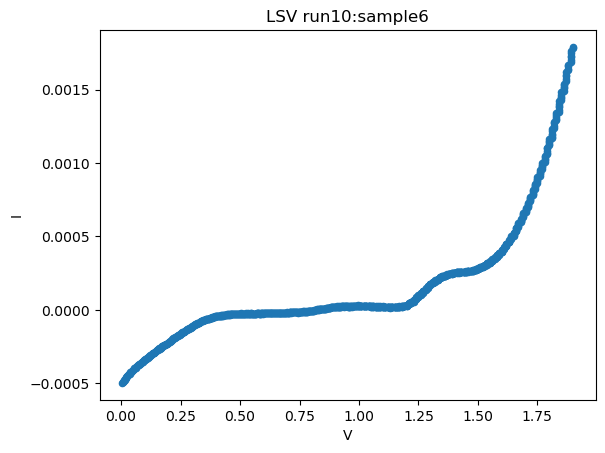

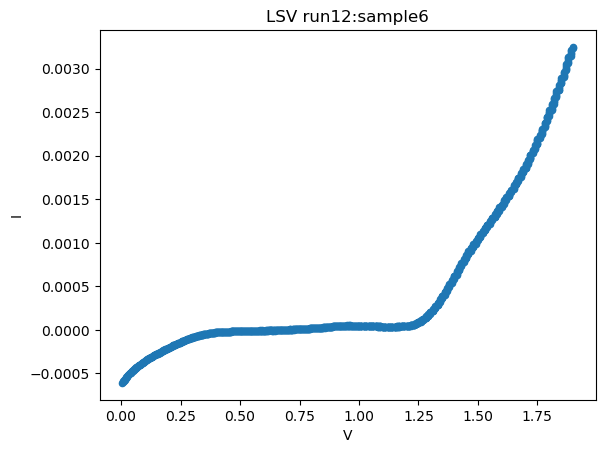

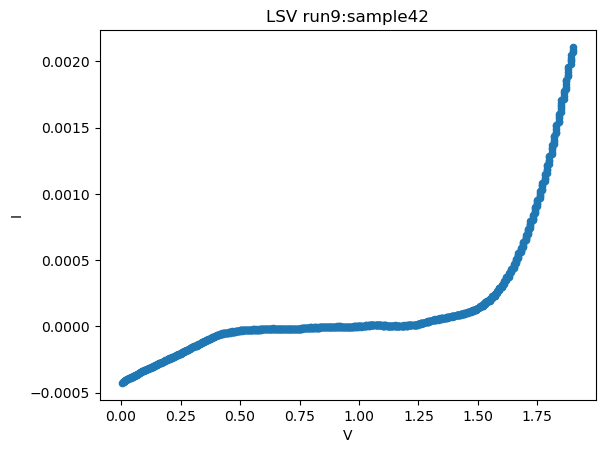

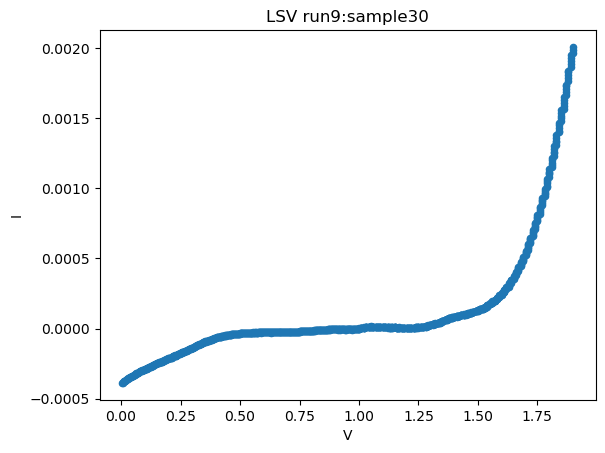

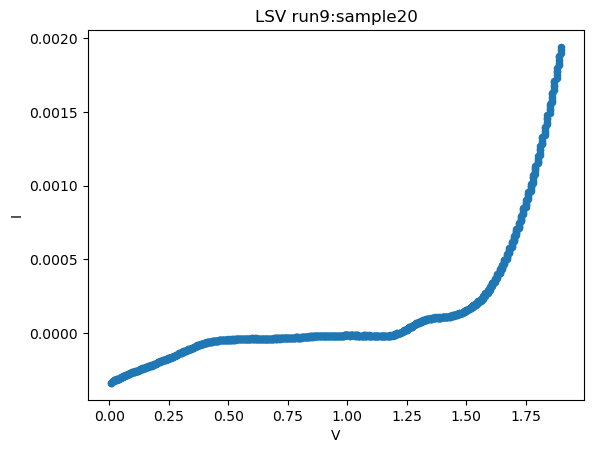

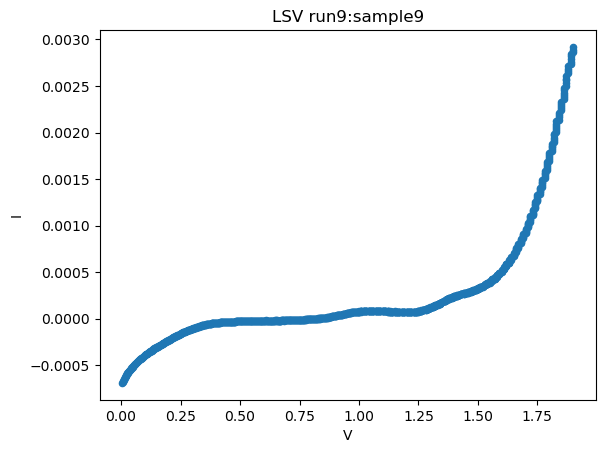

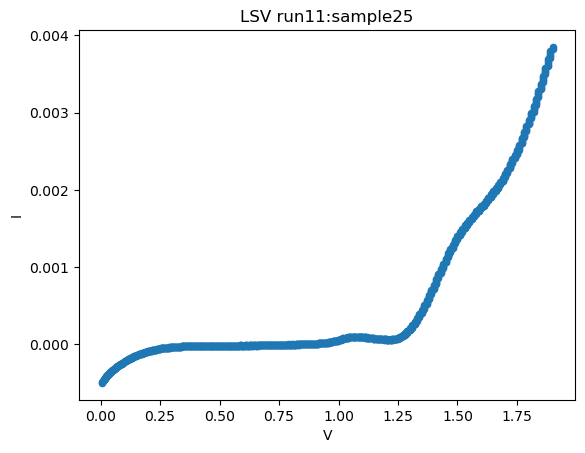

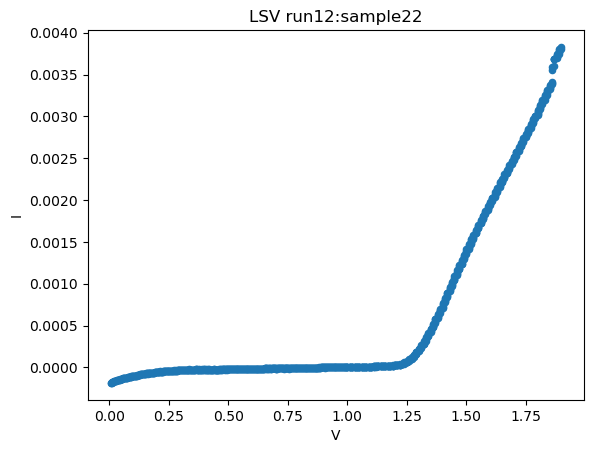

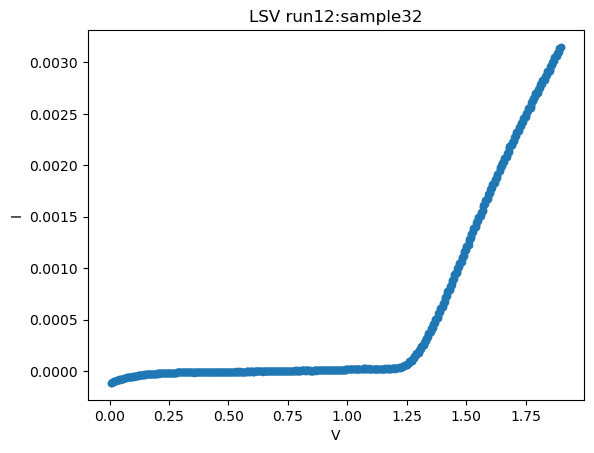

In [2]:
cv_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
catalyst_df = pd.read_csv('PtPdAuIr_summary.csv')
catalyst_df['Run #'] = catalyst_df['Run #'].str.split('-').str[0].str.lower().str.strip()
#print(catalyst_df)

for file in cv_files:
    #Joining the CV data with its catalyst row.
    if file == '.DS_Store': continue #Avoid Mac issues.
    tlist = file.lower().split('.')[0].split('-')
    run, sample = tlist[0].strip(), int(tlist[-1].replace("spot", ""))
    catalyst_row = catalyst_df[(catalyst_df['Run #'] == run) & (catalyst_df['Sample #'] == sample)]
    #print(catalyst_row)
    
    #(LSV) Linear Sweep Voltammetry (Just the 5th forward cycle)
    cv_df = pd.read_csv(path+file)
    i = 0; i5 = 0; scan_len = 949
    with open(path+file, 'r') as f:
        for line in f:
            i+=1
            if line[:6] == 'CURVE5':
                i5 = (i+2)
    MIDPOINT_I = i5 + scan_len
    lsv = cv_df.iloc[i5:MIDPOINT_I,3:5]
    lsv.columns = ['V','I']
    lsv['V'] = pd.to_numeric(lsv['V'])
    lsv['I'] = pd.to_numeric(lsv['I'])
    lsv.plot.scatter(x='V',y='I')
    plt.title('LSV '+run+':sample'+str(sample))
    plt.show()
    plt.close()